# 0. Import Package and Load Data 

In [245]:
import numpy as np 
import pandas as pd 
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd
import matplotlib.font_manager as fm
import folium
import folium.plugins
from IPython.display import IFrame
import json
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import DualMap
from tqdm.notebook import tqdm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings("ignore")
fm.get_fontconfig_fonts()
font = fm.FontProperties(fname='../input/font-list/NanumBarunGothic.ttf')
plt.style.use('ggplot')
matplotlib.rc('font',family=font.get_name())
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

In [246]:
time_df_list = []
age_df_list = []
for x in [201902,201903,201904,201905,202002,202003,202004,202005]:
    time_df_list.append('../input/sk-pop-flow/SK_유동인구/4_FLOW_TIME_'+str(x)+'.CSV')
    age_df_list.append('../input/sk-pop-flow/SK_유동인구/4_FLOW_AGE_'+str(x)+'.CSV')
time_df = pd.concat([pd.read_csv(path,sep='|') for path in time_df_list])
age_df = pd.concat([pd.read_csv(path,sep='|') for path in age_df_list])        

In [247]:
print('time_df shape:',time_df.shape)
print('age_df shape:',age_df.shape)

time_df shape: (16629, 28)
age_df shape: (16629, 34)


In [248]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STD_YM    16629 non-null  int64  
 1   STD_YMD   16629 non-null  int64  
 2   HDONG_CD  16629 non-null  int64  
 3   HDONG_NM  16629 non-null  object 
 4   TMST_00   16629 non-null  float64
 5   TMST_01   16629 non-null  float64
 6   TMST_02   16629 non-null  float64
 7   TMST_03   16629 non-null  float64
 8   TMST_04   16629 non-null  float64
 9   TMST_05   16629 non-null  float64
 10  TMST_06   16629 non-null  float64
 11  TMST_07   16629 non-null  float64
 12  TMST_08   16629 non-null  float64
 13  TMST_09   16629 non-null  float64
 14  TMST_10   16629 non-null  float64
 15  TMST_11   16629 non-null  float64
 16  TMST_12   16629 non-null  float64
 17  TMST_13   16629 non-null  float64
 18  TMST_14   16629 non-null  float64
 19  TMST_15   16629 non-null  float64
 20  TMST_16   16629 non-null  flo

In [249]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 0 to 2138
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STD_YM                  16629 non-null  int64  
 1   STD_YMD                 16629 non-null  int64  
 2   HDONG_CD                16629 non-null  int64  
 3   HDONG_NM                16629 non-null  object 
 4   MAN_FLOW_POP_CNT_0004   16629 non-null  float64
 5   MAN_FLOW_POP_CNT_0509   16629 non-null  float64
 6   MAN_FLOW_POP_CNT_1014   16629 non-null  float64
 7   MAN_FLOW_POP_CNT_1519   16629 non-null  float64
 8   MAN_FLOW_POP_CNT_2024   16629 non-null  float64
 9   MAN_FLOW_POP_CNT_2529   16629 non-null  float64
 10  MAN_FLOW_POP_CNT_3034   16629 non-null  float64
 11  MAN_FLOW_POP_CNT_3539   16629 non-null  float64
 12  MAN_FLOW_POP_CNT_4044   16629 non-null  float64
 13  MAN_FLOW_POP_CNT_4549   16629 non-null  float64
 14  MAN_FLOW_POP_CNT_5054   16629 non-null 

In [250]:
print('time_df Has 0 value in columns:',time_df.columns[time_df.min()==0].tolist()) 
print('age_df Has 0 value in columns:',age_df.columns[age_df.min()==0].tolist())

time_df Has 0 value in columns: []
age_df Has 0 value in columns: ['MAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0004']


In [251]:
print('00~04 male mean pop flow:',age_df.MAN_FLOW_POP_CNT_0004.mean())
print('00~04 female mean pop flow:',age_df.WMAN_FLOW_POP_CNT_0004.mean())
# SK제공 유동인구데이터 (SK텔레콤 가입자 기준 --> 00~04 영유아 집계 X)

00~04 male mean pop flow: 0.25103012808948455
00~04 female mean pop flow: 0.09531601419207328


In [252]:
time_df.reset_index(drop=True,inplace=True)
age_df.reset_index(drop=True,inplace=True)

In [253]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (15,15)

geo_meta = gpd.read_file('../input/sk-pop-flow/SK_유동인구/4_.SHP')
geo_meta.head(2)

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.69963062806,35.8117467030855,"POLYGON ((1110163.050 1760631.159, 1110159.980..."
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147073408,35.838758403345,"POLYGON ((1108750.463 1760472.331, 1108750.254..."


In [254]:
print(geo_meta[:35].SIDO_NM.unique()) # index 0 ~34 : 대구    35 ~ 68 : 서울
print(geo_meta[:35].SGNG_NM.unique())

['대구광역시']
['수성구' '중구']


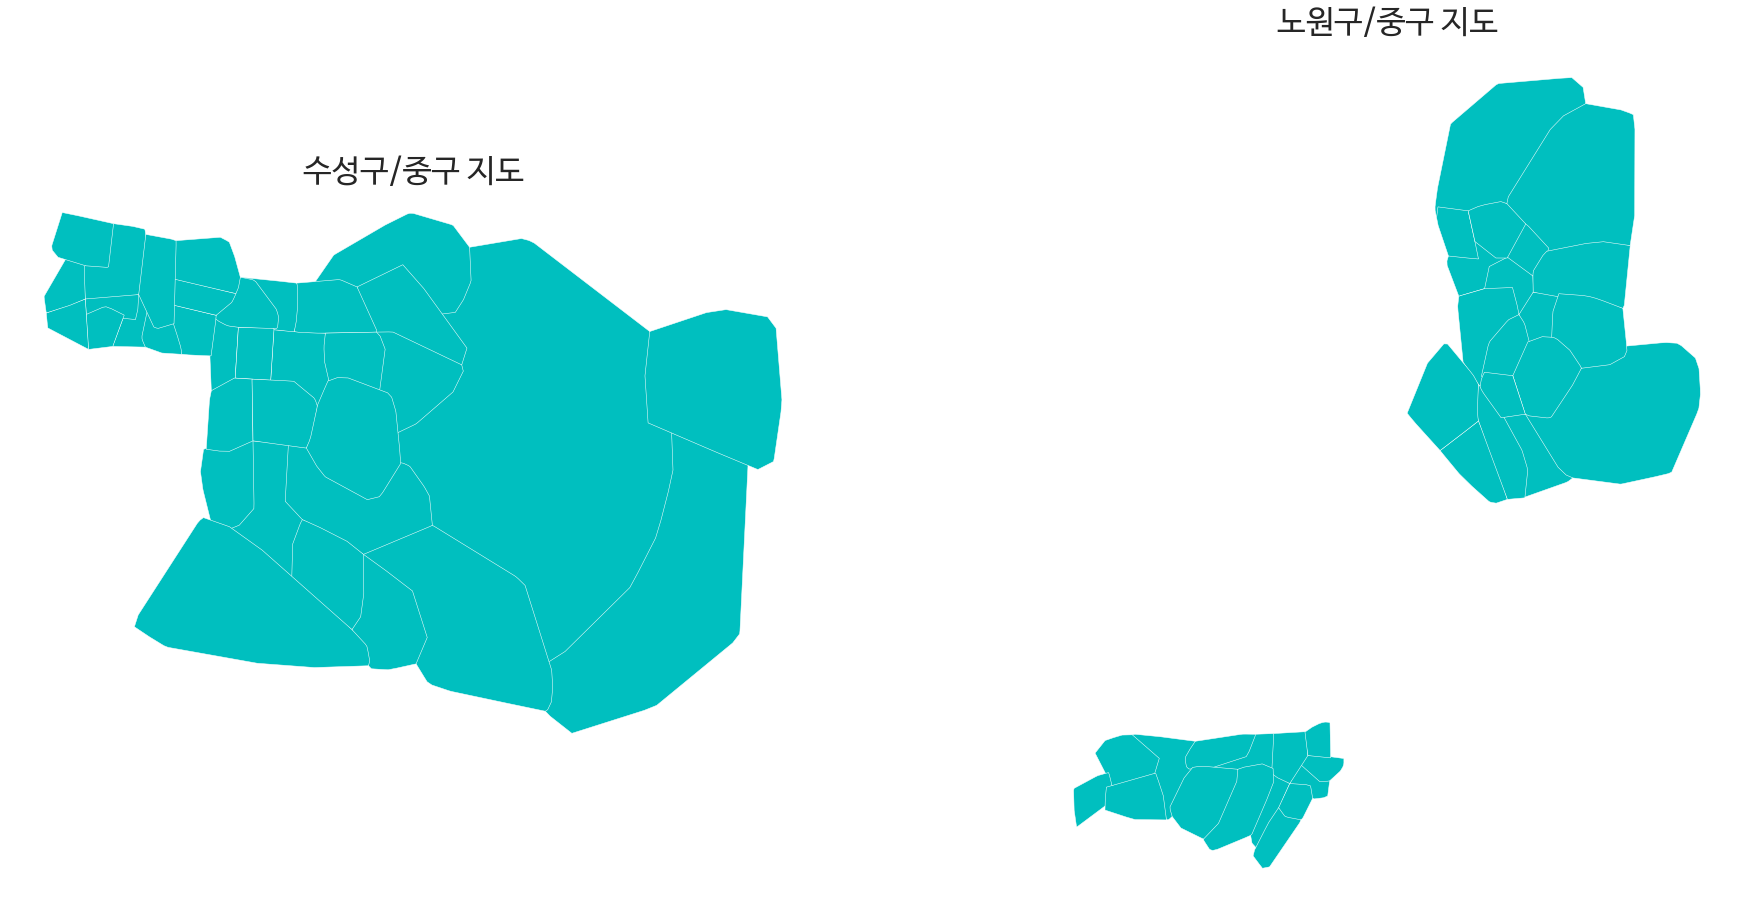

In [255]:
fig,ax = plt.subplots(1,2,figsize=(32,16))
geo_meta[:35].convex_hull.plot(color='c',edgecolor='w',ax=ax[0])
ax[0].set_title('수성구/중구 지도',fontproperties=font,size=32)
ax[0].set_axis_off()
ax[1] = geo_meta[35:].convex_hull.plot(color='c',edgecolor='w',ax=ax[1])
ax[1].set_title('노원구/중구 지도',fontproperties=font,size=32)
ax[1].set_axis_off()

plt.show()

In [256]:
geo_json = '../input/seoulgeo/seoul-dong.geojson'
geo_meta[['X_COORD','Y_COORD']]=geo_meta[['X_COORD','Y_COORD']].apply(pd.to_numeric)

In [257]:
seoul_dong_name=geo_meta[geo_meta.SIDO_NM=='서울특별시'].HDONG_NM.unique()
daegu_dong_name=geo_meta[geo_meta.SIDO_NM=='대구광역시'].HDONG_NM.unique()
print(seoul_dong_name)
print(daegu_dong_name)
print('# 중복된 동 이름:',len(seoul_dong_name.tolist()+daegu_dong_name.tolist())
      -len(set(seoul_dong_name.tolist()+daegu_dong_name.tolist())))

['공릉1동' '공릉2동' '상계10동' '상계1동' '상계2동' '상계3.4동' '상계5동' '상계6.7동' '상계8동'
 '상계9동' '월계1동' '월계2동' '월계3동' '중계1동' '중계2.3동' '중계4동' '중계본동' '하계1동' '하계2동'
 '광희동' '다산동' '동화동' '명동' '소공동' '신당5동' '신당동' '약수동' '을지로동' '장충동' '중림동' '청구동'
 '필동' '황학동' '회현동']
['고산1동' '고산2동' '고산3동' '두산동' '만촌1동' '만촌2동' '만촌3동' '범물1동' '범물2동' '범어1동'
 '범어2동' '범어3동' '범어4동' '상동' '수성1가동' '수성2.3가동' '수성4가동' '중동' '지산1동' '지산2동'
 '파동' '황금1동' '황금2동' '남산1동' '남산2동' '남산3동' '남산4동' '대봉1동' '대봉2동' '대신동' '동인동'
 '삼덕동' '성내1동' '성내2동' '성내3동']
# 중복된 동 이름: 0


In [258]:
time_df['SI_NM'] = time_df.HDONG_NM.isin(seoul_dong_name)
time_df['SI_NM']=time_df['SI_NM'].replace({True:'서울',False:'대구'})
time_df.sample(2)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,SI_NM
6028,201904,20190429,1135062500,중계2.3동,1267.51,779.06,516.31,434.46,535.97,896.98,...,4660.17,5207.36,6035.34,7267.42,6962.63,5289.55,4459.12,3651.50,2549.34,서울
4818,201904,20190411,2726060200,황금2동,1350.89,1082.50,767.68,522.21,403.64,489.23,...,3571.83,4412.93,4482.79,5170.05,4726.37,3680.32,3354.60,2893.07,2014.49,대구


In [259]:
time_df['dayflow']=time_df.loc[:,'TMST_00':'TMST_23'].mean(axis=1)
time_df['date']=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')
gu_dict=geo_meta[['HDONG_CD','SGNG_NM']].set_index('HDONG_CD').to_dict()['SGNG_NM']
time_df['GU_NM'] = time_df['HDONG_CD'].apply(lambda x: gu_dict[str(x)] )
time_df['HDONG_CD'] = time_df['HDONG_CD'].apply(pd.to_numeric)
time_df.loc[time_df[(time_df['HDONG_CD']>=2000000000)&(time_df['GU_NM']=='중구')]['GU_NM'].index,'GU_NM'] = '대구_중구'

In [260]:
time_df.sample(7)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,SI_NM,dayflow,date,GU_NM
12647,202004,20200404,1135061100,하계1동,1031.44,641.12,445.20,369.23,374.82,565.78,...,3502.24,2855.06,2476.01,2242.73,2014.35,1285.40,서울,2108.21,2020-04-04,노원구
6768,201905,20190510,1114060500,을지로동,957.38,440.96,338.50,324.53,502.33,991.61,...,15454.28,9885.24,5704.64,4767.18,4186.93,3294.76,서울,6590.93,2019-05-10,중구
13935,202004,20200422,2726067000,고산1동,2015.97,1492.12,1152.86,959.82,902.42,1252.66,...,9807.16,7896.50,5715.37,4515.70,4040.22,3027.17,대구,4764.37,2020-04-22,수성구
6824,201905,20190510,2726065100,지산1동,981.79,694.23,485.03,320.32,316.36,294.60,...,5398.47,5196.12,3962.12,3532.17,3554.12,2268.24,대구,2714.82,2019-05-10,수성구
1080,201902,20190216,2711069000,대봉2동,142.07,89.85,60.46,36.37,35.55,78.40,...,618.63,405.54,406.88,319.25,221.01,156.41,대구,333.54,2019-02-16,대구_중구
14750,202005,20200504,2726057000,수성1가동,869.86,684.33,546.85,549.72,523.55,631.44,...,5012.87,4421.66,3271.64,2752.47,2243.53,1520.85,대구,2496.66,2020-05-04,수성구
8905,202002,20200210,1114058000,장충동,406.74,292.99,248.15,185.47,255.21,586.08,...,4263.42,3092.97,2085.76,1739.94,1462.96,1008.39,서울,2434.57,2020-02-10,중구


In [261]:
pop=pd.read_csv('../input/dong-pop-data/___5__2011__20200919121627.csv',encoding = 'CP949')
pop=pop.rename(columns={'행정구역(동읍면)별':'행정구역'})

In [262]:
dong_pop=pop[pop.항목=='총인구수 (명)'][['행정구역','2019. 05','2020. 05']].set_index('행정구역').drop(['서울특별시','대구광역시','수성구','중구','노원구'],axis=0)
dong_pop.index=dong_pop.index.str.replace('신당제5동','신당5동')

In [263]:
dong_pop.sort_index(inplace=True)

In [264]:
dong_pop['2019. 05']=dong_pop['2019. 05'].astype(int)
dong_pop['2020. 05']=dong_pop['2020. 05'].astype(int)

In [265]:
dong_pop_avg=pd.DataFrame(dong_pop.sum(axis=1),columns=['인구'])

In [266]:
dong_pop_avg['인구']=(dong_pop_avg['인구']/2).astype(int)

In [267]:
dong_meta=pd.merge(time_df.set_index('HDONG_NM').loc[~time_df.set_index('HDONG_NM').index.duplicated(keep='first')][['SI_NM','GU_NM']].reset_index().rename(columns={'HDONG_NM':'행정구역'}),dong_pop_avg.reset_index())
dong_meta=dong_meta.join(time_df[['HDONG_NM','HDONG_CD']],how='inner').drop('행정구역',1)
dong_meta=dong_meta[['SI_NM','GU_NM','HDONG_NM','HDONG_CD','인구']]
dong_meta.head()

,SI_NM,GU_NM,HDONG_NM,HDONG_CD,인구
0,서울,중구,소공동,1114052000,2086
1,서울,중구,회현동,1114054000,5270
2,서울,중구,명동,1114055000,2898
3,서울,중구,필동,1114057000,4012
4,서울,중구,장충동,1114058000,4706


# 1. 동별 특성 파악 

In [351]:
dong_dayflow_2019=pd.DataFrame(time_df.set_index('date')['2019'].groupby('HDONG_NM').sum()['dayflow'].sort_values(ascending=False))
dong_dayflow_2020=pd.DataFrame(time_df.set_index('date')['2020'].groupby('HDONG_NM').sum()['dayflow'].sort_values(ascending=False))

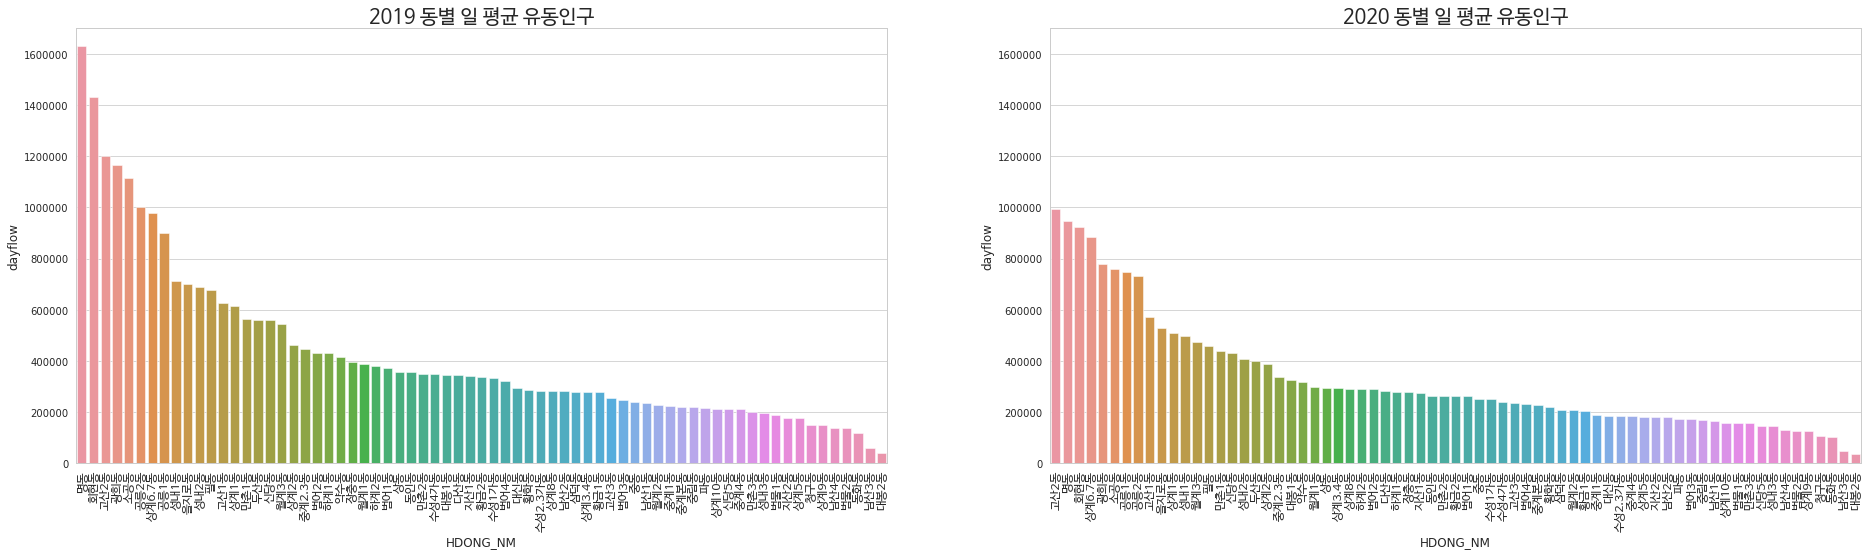

In [368]:
fig,ax=plt.subplots(1,2,figsize=(32,8))
sns.barplot(data=dong_dayflow_2019,x=dong_dayflow_2019.index,y='dayflow',ax=ax[0])
ax[0].set_xticklabels(dong_dayflow_2019.index,fontproperties=font,rotation=90,size=12)
sns.barplot(data=dong_dayflow_2020,x=dong_dayflow_2020.index,y='dayflow',ax=ax[1])
ax[1].set_xticklabels(dong_dayflow_2020.index,fontproperties=font,rotation=90,size=12)
ax[0].set_title('2019 동별 일 평균 유동인구',fontproperties=font,size=20)
ax[1].set_title('2020 동별 일 평균 유동인구',fontproperties=font,size=20)
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain',axis='y')
ax[0].set_ylim([0,1700000])
ax[1].set_ylim([0,1700000])
plt.show()

In [395]:
dong_merged_dayflow=pd.merge(dong_dayflow_2019.reset_index(),dong_dayflow_2020.reset_index(),on='HDONG_NM',suffixes=['_2019','_2020'])
dong_merged_dayflow=dong_merged_dayflow.set_index('HDONG_NM')

In [402]:
dong_merged_dayflow['change'].sort_values(ascending=False)

HDONG_NM
명동       683193.54
회현동      506003.87
광희동      385590.68
소공동      352802.18
성내2동     282329.64
            ...   
상계5동      -5850.40
중계본동      -7842.30
상계8동      -9238.67
중동       -11050.90
상계3.4동   -13487.85
Name: change, Length: 69, dtype: float64

Text(0.5, 1.0, '동별 일 평균 유동감소량 (2019 - 2020)')

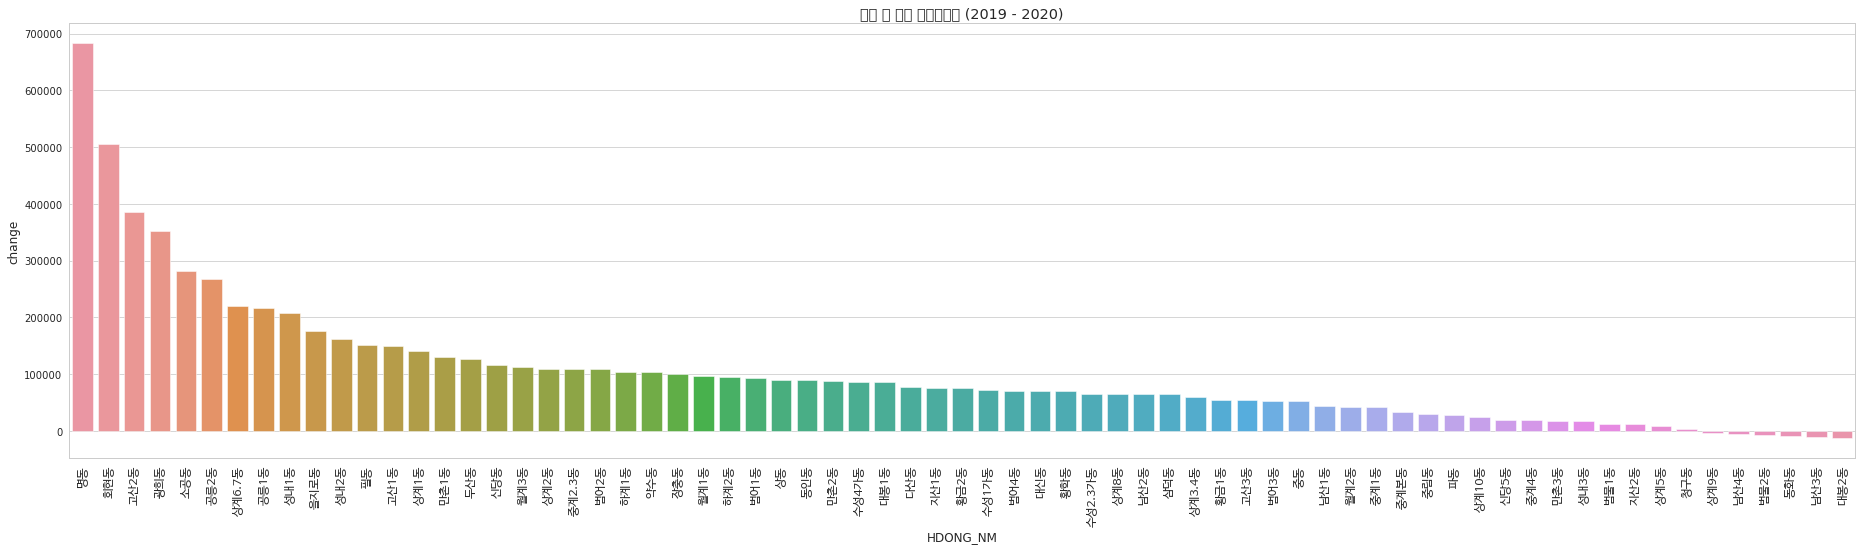

In [404]:
dong_merged_dayflow['change']=dong_merged_dayflow.dayflow_2019-dong_merged_dayflow.dayflow_2020
fig,ax=plt.subplots(figsize=(32,8))
sns.barplot(data=dong_merged_dayflow,x=dong_merged_dayflow.index,y='change',order=dong_merged_dayflow.sort_values('change',ascending=False).index)
ax.ticklabel_format(style='plain',axis='y')
ax.set_xticklabels(dong_merged_dayflow.index,fontproperties=font,rotation=90,size=12)
ax.set_title('동별 일 평균 유동감소량 (2019 - 2020)')

# 2.  서울(중구 노원구)/대구(중구 수성구) 코로나 전후 월/주/일/시간별 유동인구 추이

In [269]:
seoul_dayflow_2019=time_df[(time_df['date']<'2020') & (time_df['HDONG_NM'].isin(seoul_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]
seoul_dayflow_2020=time_df[(time_df['date']>='2020') & (time_df['HDONG_NM'].isin(seoul_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]
daegu_dayflow_2019=time_df[(time_df['date']<'2020') & (time_df
                                                      ['HDONG_NM'].isin(daegu_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]
daegu_dayflow_2020=time_df[(time_df['date']>='2020') & (time_df['HDONG_NM'].isin(daegu_dong_name))].groupby('HDONG_NM').sum().reset_index()[['HDONG_NM','dayflow']]

In [270]:
seoul_dayflow_2019=pd.merge(pd.merge(dong_pop.reset_index()[['행정구역','2019. 05']],seoul_dayflow_2019,left_on='행정구역',right_on='HDONG_NM').drop('행정구역',axis=1),dong_meta[['HDONG_NM','HDONG_CD']])
seoul_dayflow_2020=pd.merge(pd.merge(dong_pop.reset_index()[['행정구역','2020. 05']],seoul_dayflow_2020,left_on='행정구역',right_on='HDONG_NM').drop('행정구역',axis=1),dong_meta[['HDONG_NM','HDONG_CD']])
daegu_dayflow_2019=pd.merge(pd.merge(dong_pop.reset_index()[['행정구역','2019. 05']],daegu_dayflow_2019,left_on='행정구역',right_on='HDONG_NM').drop('행정구역',axis=1),dong_meta[['HDONG_NM','HDONG_CD']])
daegu_dayflow_2020=pd.merge(pd.merge(dong_pop.reset_index()[['행정구역','2020. 05']],daegu_dayflow_2020,left_on='행정구역',right_on='HDONG_NM').drop('행정구역',axis=1),dong_meta[['HDONG_NM','HDONG_CD']])

In [271]:
seoul_dayflow_2019 = seoul_dayflow_2019.sort_values('HDONG_NM').reset_index(drop=True).rename(columns={'2019. 05':'인구'})
seoul_dayflow_2020 = seoul_dayflow_2020.sort_values('HDONG_NM').reset_index(drop=True).rename(columns={'2020. 05':'인구'})
daegu_dayflow_2019 = daegu_dayflow_2019.sort_values('HDONG_NM').reset_index(drop=True).rename(columns={'2019. 05':'인구'})
daegu_dayflow_2020 = daegu_dayflow_2020.sort_values('HDONG_NM').reset_index(drop=True).rename(columns={'2020. 05':'인구'})

In [272]:
seoul_dayflow_2019['HDONG_CD']=seoul_dayflow_2019.HDONG_CD.astype(str)
seoul_dayflow_2020['HDONG_CD']=seoul_dayflow_2020.HDONG_CD.astype(str)
daegu_dayflow_2019['HDONG_CD']=daegu_dayflow_2019.HDONG_CD.astype(str)
daegu_dayflow_2020['HDONG_CD']=daegu_dayflow_2020.HDONG_CD.astype(str)
seoul_dayflow_2019['dayflow']=seoul_dayflow_2019.dayflow.astype(int)
seoul_dayflow_2020['dayflow']=seoul_dayflow_2020.dayflow.astype(int)
daegu_dayflow_2019['dayflow']=daegu_dayflow_2019.dayflow.astype(int)
daegu_dayflow_2020['dayflow']=daegu_dayflow_2020.dayflow.astype(int)

In [273]:
# with open('../input/korgeo/HangJeongDong_ver20200701.geojson',mode='rt',encoding='utf-8') as f:
#     g = json.loads(f.read())
#     f.close()
# m = folium.plugins.DualMap(location=(37.615,127.046), zoom_start=11.8)
# temp=pd.concat([seoul_dayflow_2019,seoul_dayflow_2020])['dayflow']
# interval=(temp.max()-temp.min())/6
# bins=list(map(float,[temp.min(),temp.min()+interval,temp.min()+interval*2,temp.min()+interval*3,temp.min()+interval*4,temp.min()+interval*5,temp.max()]))
# m.m1.choropleth( geo_data=g, data=seoul_dayflow_2019, columns=('HDONG_CD', 'dayflow'), 
#                   key_on='feature.properties.adm_cd2', fill_color = 'YlOrRd',
#                 fill_opacity=0.8,
#     line_opacity=0.5,
#                 bins=bins)
# m.m2.choropleth( geo_data=g, data=seoul_dayflow_2020, columns=('HDONG_CD', 'dayflow'), 
#                   key_on='feature.properties.adm_cd2', fill_color = 'YlOrRd',fill_opacity=0.8,
#     line_opacity=0.5,
#                 bins=bins)

# m.save('./map1.html')
# IFrame(src='./map1.html', width=1000, height=600)

In [274]:
# m = folium.plugins.DualMap(location=(35.843, 128.626), zoom_start=11.8)
# temp=pd.concat([daegu_dayflow_2019,daegu_dayflow_2020])['dayflow']
# interval=(temp.max()-temp.min())/6
# bins=list(map(float,[temp.min(),temp.min()+interval,temp.min()+interval*2,temp.min()+interval*3,temp.min()+interval*4,temp.min()+interval*5,temp.max()]))
# m.m1.choropleth( geo_data=g, data=daegu_dayflow_2019, columns=('HDONG_CD', 'dayflow'), 
#                   key_on='feature.properties.adm_cd2', fill_color = 'YlOrRd',
#                 fill_opacity=0.8,
#     line_opacity=0.5,
#                 bins=bins)
# m.m2.choropleth( geo_data=g, data=daegu_dayflow_2020, columns=('HDONG_CD', 'dayflow'), 
#                   key_on='feature.properties.adm_cd2', fill_color = 'YlOrRd',fill_opacity=0.8,
#     line_opacity=0.5,
#                 bins=bins)

# m.save('./map1.html')
# IFrame(src='./map1.html', width=1000, height=600)

In [275]:
seoul_dayflow_2019_geo=pd.merge(seoul_dayflow_2019,geo_meta[['HDONG_NM','X_COORD','Y_COORD']])[['Y_COORD','X_COORD','dayflow']].values
seoul_dayflow_2020_geo=pd.merge(seoul_dayflow_2020,geo_meta[['HDONG_NM','X_COORD','Y_COORD']])[['Y_COORD','X_COORD','dayflow']].values
daegu_dayflow_2019_geo=pd.merge(daegu_dayflow_2019,geo_meta[['HDONG_NM','X_COORD','Y_COORD']])[['Y_COORD','X_COORD','dayflow']].values
daegu_dayflow_2020_geo=pd.merge(daegu_dayflow_2020,geo_meta[['HDONG_NM','X_COORD','Y_COORD']])[['Y_COORD','X_COORD','dayflow']].values

In [276]:
# m = DualMap(location=[37.615, 127.046],
#                     zoom_start = 11.8,geo_data=g) 
# HeatMap(seoul_dayflow_2019_geo,radius=30).add_to(m.m1)
# HeatMap(seoul_dayflow_2020_geo,radius=30).add_to(m.m2)
# m


In [277]:
# m = DualMap(location=[35.843, 128.626],
#                     zoom_start = 11.8,geo_data=g) 
# HeatMap(daegu_dayflow_2019_geo,radius=30).add_to(m.m1)
# HeatMap(daegu_dayflow_2020_geo,radius=30).add_to(m.m2)
# m


In [278]:
time_df[time_df.date<'2020'].groupby('HDONG_NM').mean().loc[:,'TMST_00':'TMST_23'].reset_index()

,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,고산1동,1767.02,1199.42,879.84,702.76,685.42,1154.95,2470.40,4844.88,6237.10,...,7350.83,7816.05,8616.23,9739.61,10210.10,8039.38,6528.69,5850.21,4689.04,2933.36
1,고산2동,2725.53,1751.19,1201.32,932.44,1043.74,2225.50,5188.94,10206.78,13025.79,...,15000.79,15813.37,17162.75,18799.91,19369.28,14510.36,11653.34,10373.85,7651.33,4729.56
2,고산3동,792.71,545.63,387.03,308.91,314.33,515.72,1003.81,1796.82,2440.59,...,2958.52,3217.32,3480.44,3892.88,4246.03,3404.65,2760.38,2613.46,2020.43,1272.18
3,공릉1동,3152.60,2037.42,1556.84,1329.33,1466.64,2626.94,4712.65,9082.73,10800.57,...,9418.63,10089.48,10987.38,12392.06,13669.18,11737.40,9142.38,8520.60,7631.00,5186.03
4,공릉2동,3203.54,2210.20,1664.35,1443.80,1566.66,2651.52,5011.36,9606.70,12360.99,...,12219.52,12286.87,12431.27,13482.93,13036.72,10656.11,8594.30,7941.92,6838.90,4749.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,하계2동,1269.12,727.02,491.88,414.77,450.79,1001.90,2014.27,3905.51,4204.88,...,4140.27,4416.50,4820.79,5358.64,5737.97,4901.15,3991.76,3809.49,3319.78,2224.63
65,황금1동,1045.27,699.41,491.61,358.66,349.08,489.37,976.49,2258.06,2780.20,...,3094.17,3422.04,3806.79,4020.90,4227.18,3738.94,3158.40,3112.71,2591.81,1627.42
66,황금2동,1264.28,952.18,714.34,529.05,437.16,534.53,1010.86,1997.20,3066.90,...,4042.68,4244.94,4483.94,4952.95,5306.23,4416.95,3680.00,3318.42,2604.87,1779.33
67,황학동,709.34,411.39,319.29,270.41,327.89,732.82,1382.95,3334.97,4695.86,...,3152.99,3268.19,3377.09,3855.80,4611.79,3277.38,2471.79,2340.83,2077.57,1487.49


In [279]:
daytime_geo=pd.merge(geo_meta[['HDONG_NM','X_COORD','Y_COORD']],time_df[time_df.date<'2020'].groupby('HDONG_NM').mean().loc[:,'TMST_00':'TMST_23'].reset_index())

In [280]:
### scaling
for col in daytime_geo.loc[:,'TMST_00':'TMST_23'].columns.tolist():
    daytime_geo[col] = daytime_geo[col]/daytime_geo[col].sum()*50

In [281]:
melted_df=pd.melt(daytime_geo.drop('HDONG_NM',axis=1),id_vars=['X_COORD','Y_COORD'])
melted_df=melted_df[['Y_COORD','X_COORD','variable','value']]
melted_df.variable=pd.to_numeric(melted_df.variable.str[5:])

In [282]:
hm_arr=[]
for i in range(24):
    hm_arr.append(melted_df.set_index('variable').loc[i,:].values.tolist())

In [283]:
# m=folium.Map(location=[37.615, 127.046],
#                     zoom_start = 11.8) 
# hm = plugins.HeatMapWithTime(hm_arr,auto_play=True,radius=80)
# hm.add_to(m)
# m

In [284]:
seoul_dayflow=time_df.groupby(['SI_NM','date']).sum().loc['서울','dayflow']
daegu_dayflow=time_df.groupby(['SI_NM','date']).sum().loc['대구','dayflow']
seoul_dayflow=seoul_dayflow.reset_index()
daegu_dayflow=daegu_dayflow.reset_index()
se_dayflow=seoul_dayflow.drop(seoul_dayflow[seoul_dayflow.date=='2020-02-29'].index,axis=0)
da_dayflow=daegu_dayflow.drop(daegu_dayflow[daegu_dayflow.date=='2020-02-29'].index,axis=0)

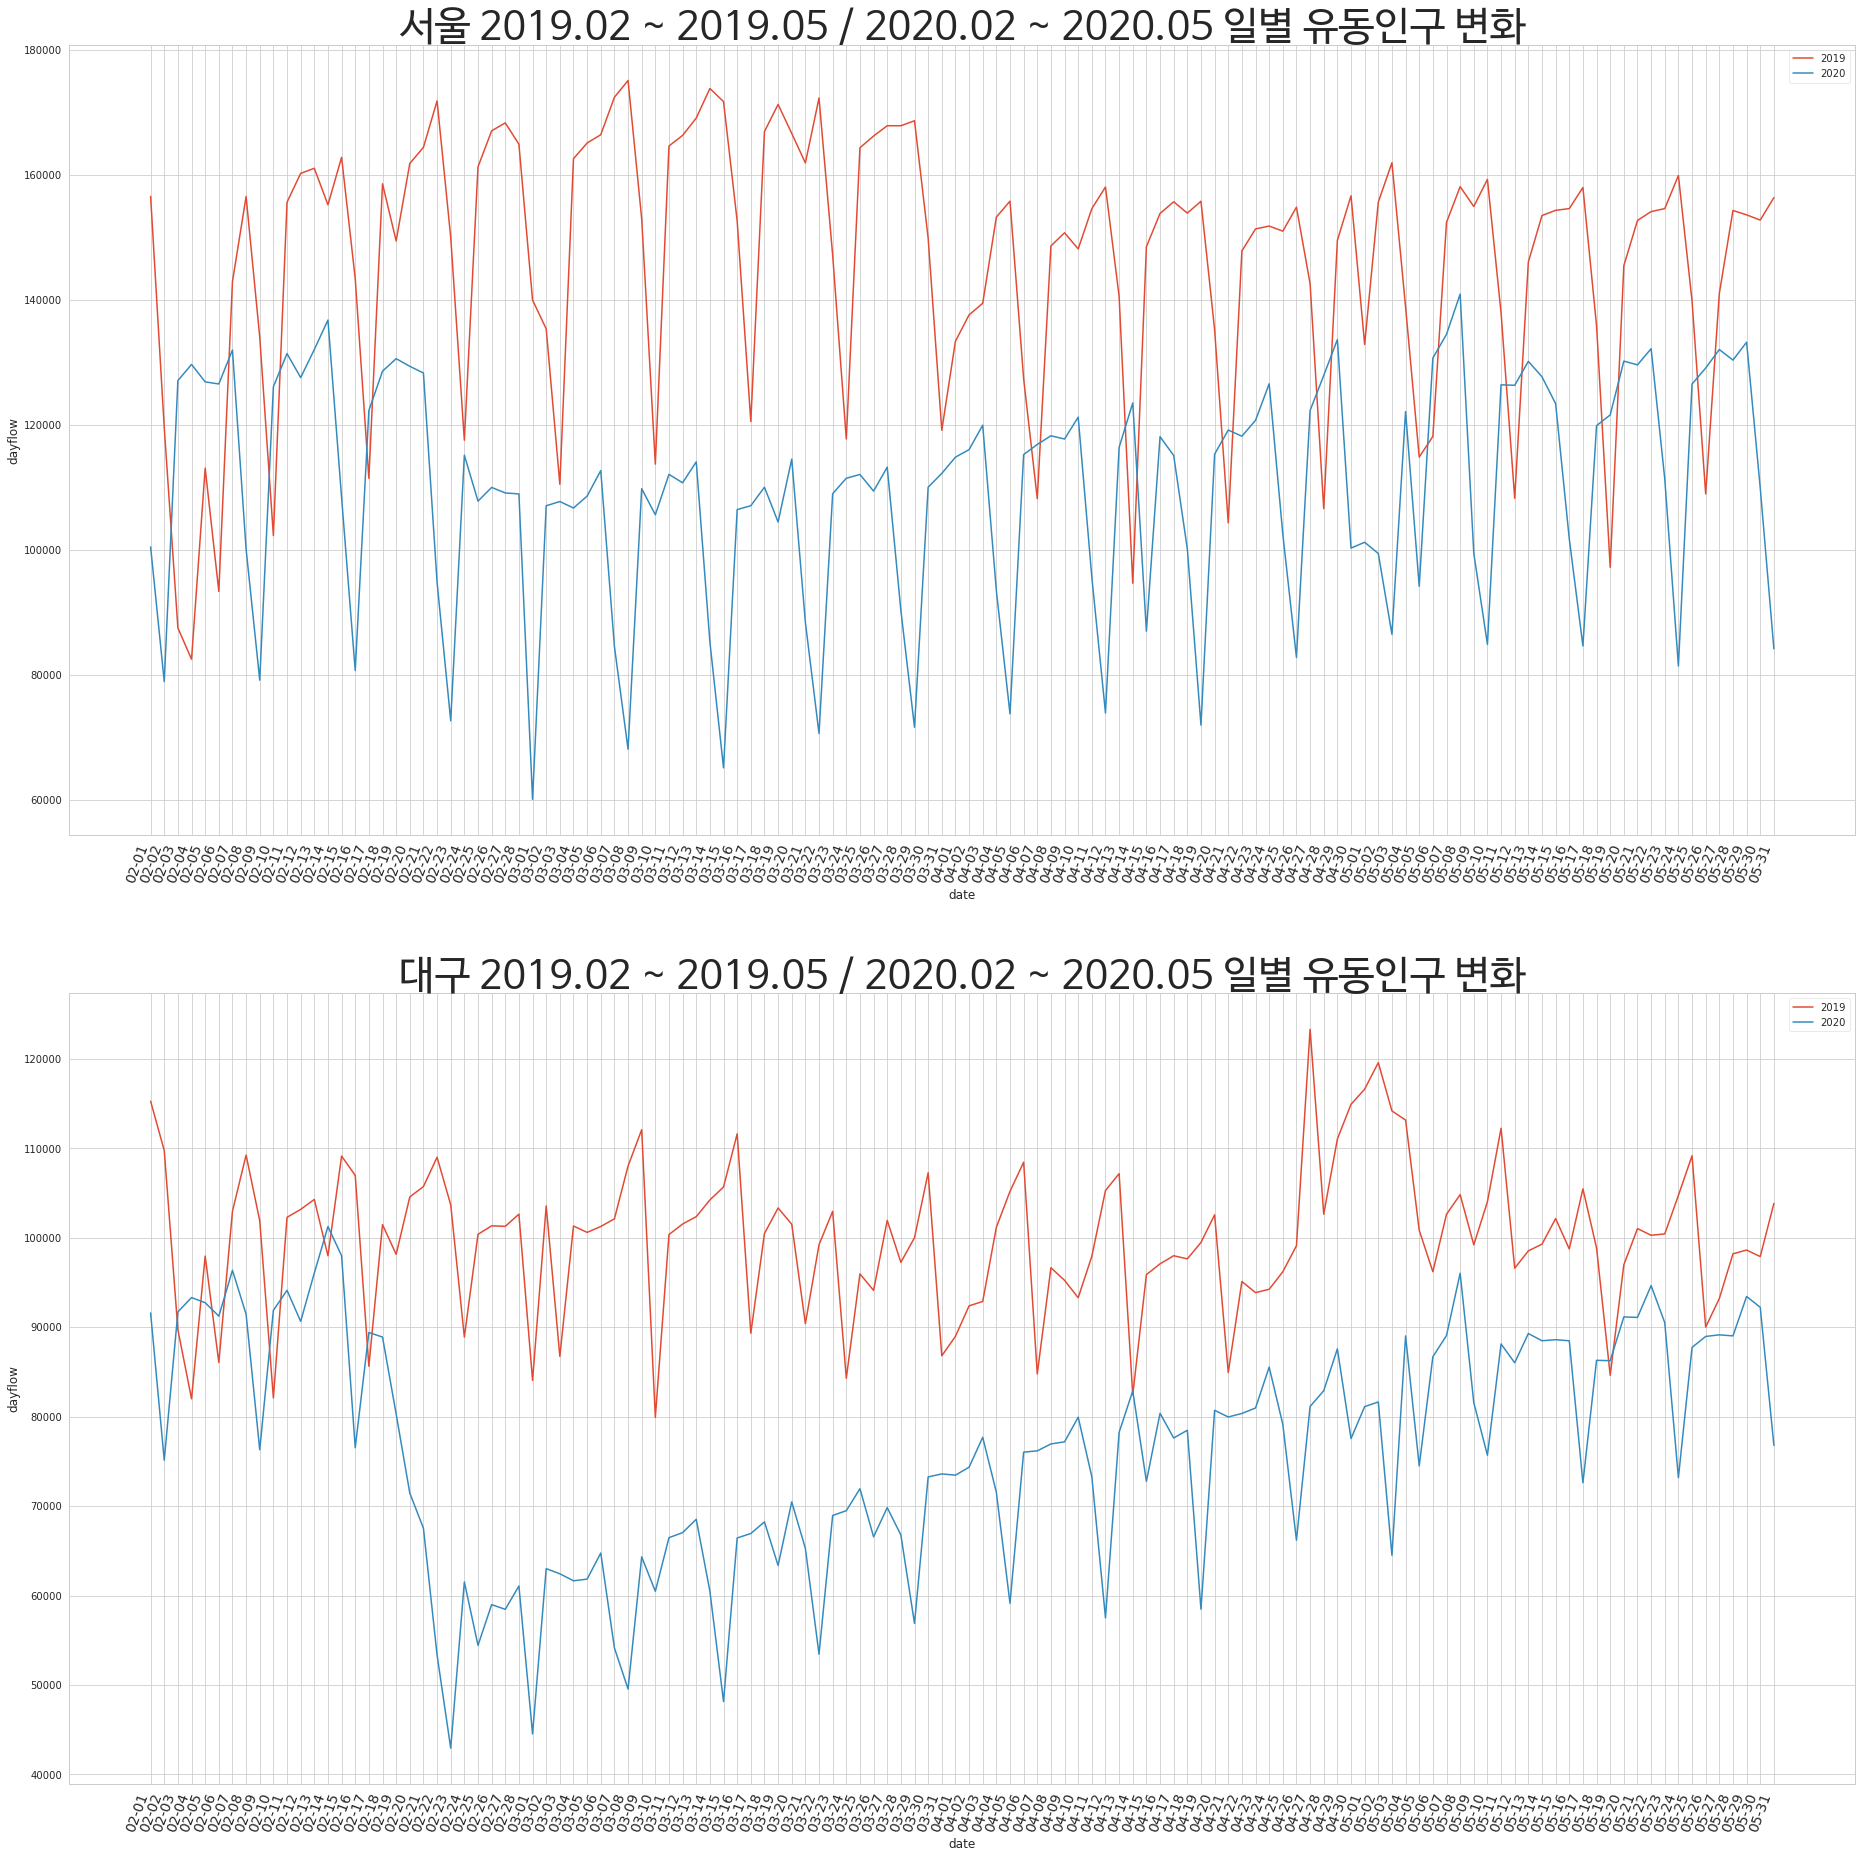

In [285]:
def compare_dayflow(df1,df2,title_1,title_2):
    
    sns.set_style("whitegrid")
    fig,ax = plt.subplots(2,1,figsize=(32,32))
    sns.lineplot(x=df1[df1.date<'2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.date<'2020']['dayflow'],ax=ax[0],label='2019')
    sns.lineplot(x=df1[df1.date>='2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.date>='2020']['dayflow'],ax=ax[0],label='2020')

    sns.lineplot(x=df2[df2.date<'2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.date<'2020']['dayflow'],ax=ax[1],label='2019')
    sns.lineplot(x=df2[df2.date>='2020']['date'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.date>='2020']['dayflow'],ax=ax[1],label='2020')
    plt.setp(ax[0].get_xticklabels(), rotation=70, ha='right',size=14)
    plt.setp(ax[1].get_xticklabels(), rotation=70, ha='right',size=14)
    ax[0].set_title(title_1,fontproperties=font,size=40)
    ax[1].set_title(title_2,fontproperties=font,size=40)
    plt.legend()
    plt.show()
def compare_weekflow(df1,df2,title_1,title_2):
    
    sns.set_style("whitegrid")
    fig,ax = plt.subplots(2,1,figsize=(32,32))
    sns.lineplot(x=df1[df1.week<'2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.week<'2020']['dayflow'],ax=ax[0],label='2019')
    sns.lineplot(x=df1[df1.week>='2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df1[df1.week>='2020']['dayflow'],ax=ax[0],label='2020')

    sns.lineplot(x=df2[df2.week<'2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.week<'2020']['dayflow'],ax=ax[1],label='2019')
    sns.lineplot(x=df2[df2.week>='2020']['week'].apply(lambda x : x.strftime('%m-%d')),
                 y=df2[df2.week>='2020']['dayflow'],ax=ax[1],label='2020')
    plt.setp(ax[0].get_xticklabels(), rotation=70, ha='right',size=14)
    plt.setp(ax[1].get_xticklabels(), rotation=70, ha='right',size=14)
    ax[0].set_title(title_1,fontproperties=font,size=40)
    ax[1].set_title(title_2,fontproperties=font,size=40)
    plt.legend()
    plt.show()
compare_dayflow(se_dayflow,da_dayflow,'서울 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화',
               '대구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화')

In [286]:
suseong_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['수성구','dayflow']
d_jung_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['대구_중구','dayflow']
noone_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['노원구','dayflow']
jung_dayflow=time_df.groupby(['GU_NM','date']).sum().loc['중구','dayflow']

suseong_dayflow=suseong_dayflow.reset_index()
d_jung_dayflow=d_jung_dayflow.reset_index()
noone_dayflow=noone_dayflow.reset_index()
jung_dayflow=jung_dayflow.reset_index()

su_dayflow=suseong_dayflow.drop(suseong_dayflow[suseong_dayflow.date=='2020-02-29'].index,axis=0,)
djung_dayflow=d_jung_dayflow.drop(d_jung_dayflow[d_jung_dayflow.date=='2020-02-29'].index,axis=0,)
no_dayflow=noone_dayflow.drop(noone_dayflow[noone_dayflow.date=='2020-02-29'].index,axis=0,)
sjung_dayflow=jung_dayflow.drop(jung_dayflow[jung_dayflow.date=='2020-02-29'].index,axis=0,)

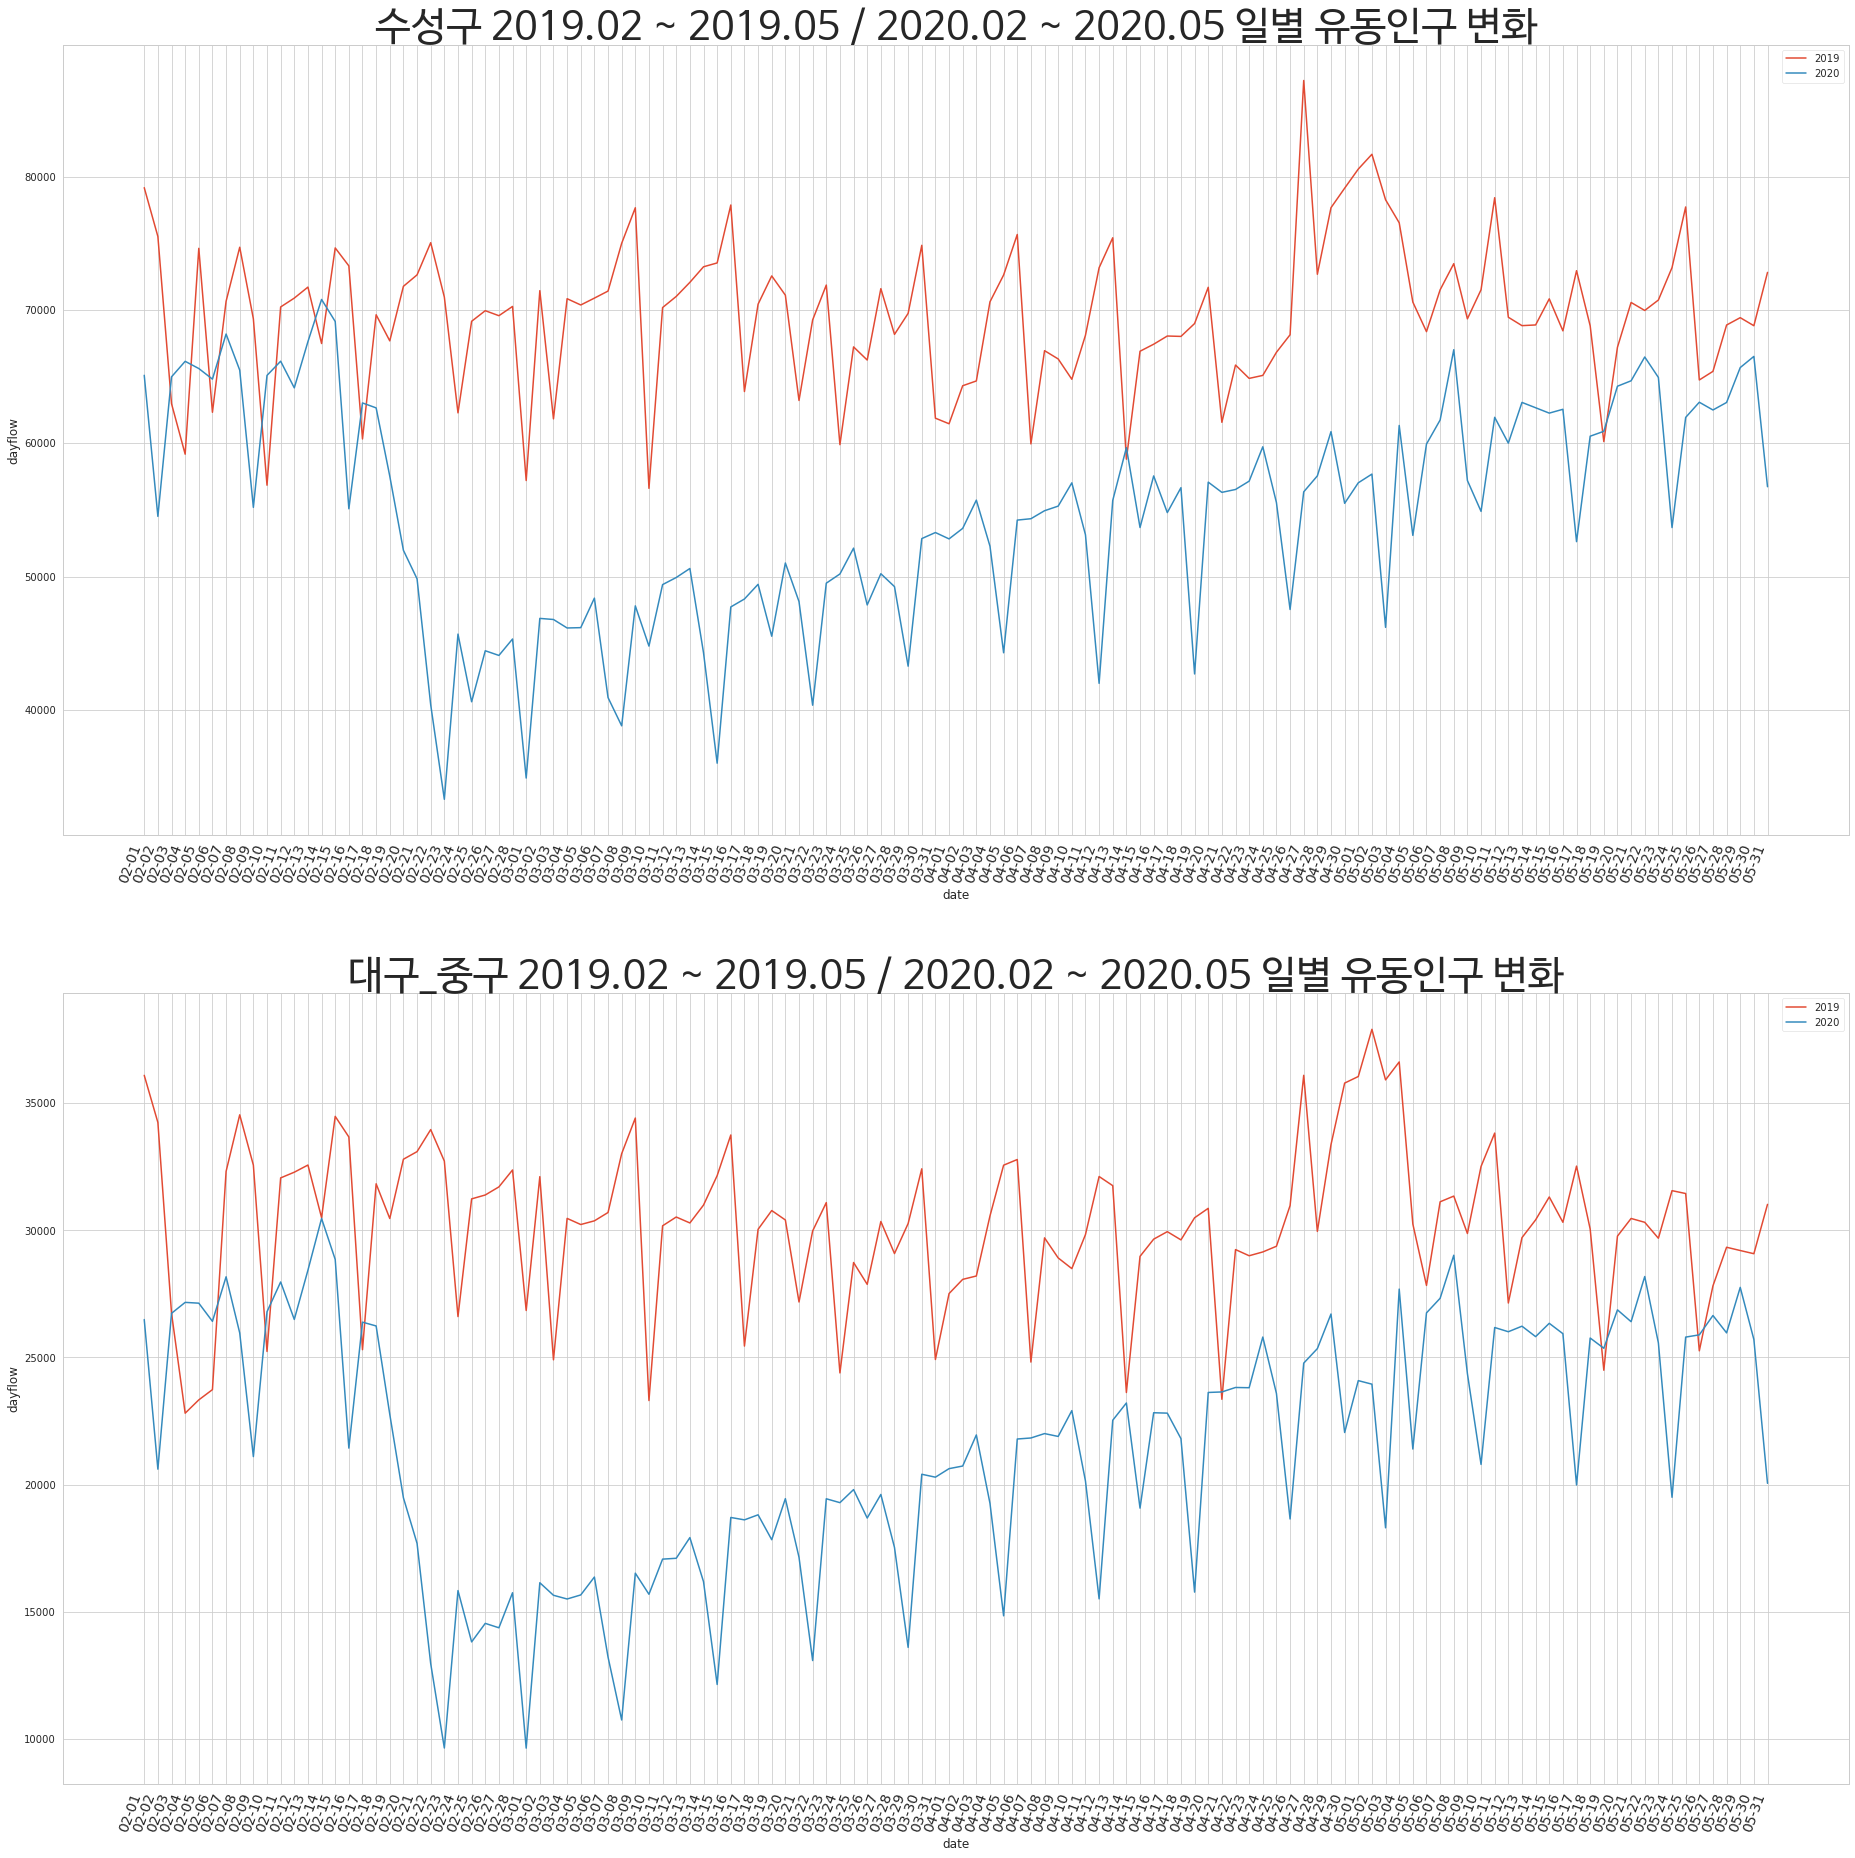

In [287]:
compare_dayflow(su_dayflow,djung_dayflow,'수성구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화',
               '대구_중구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화')

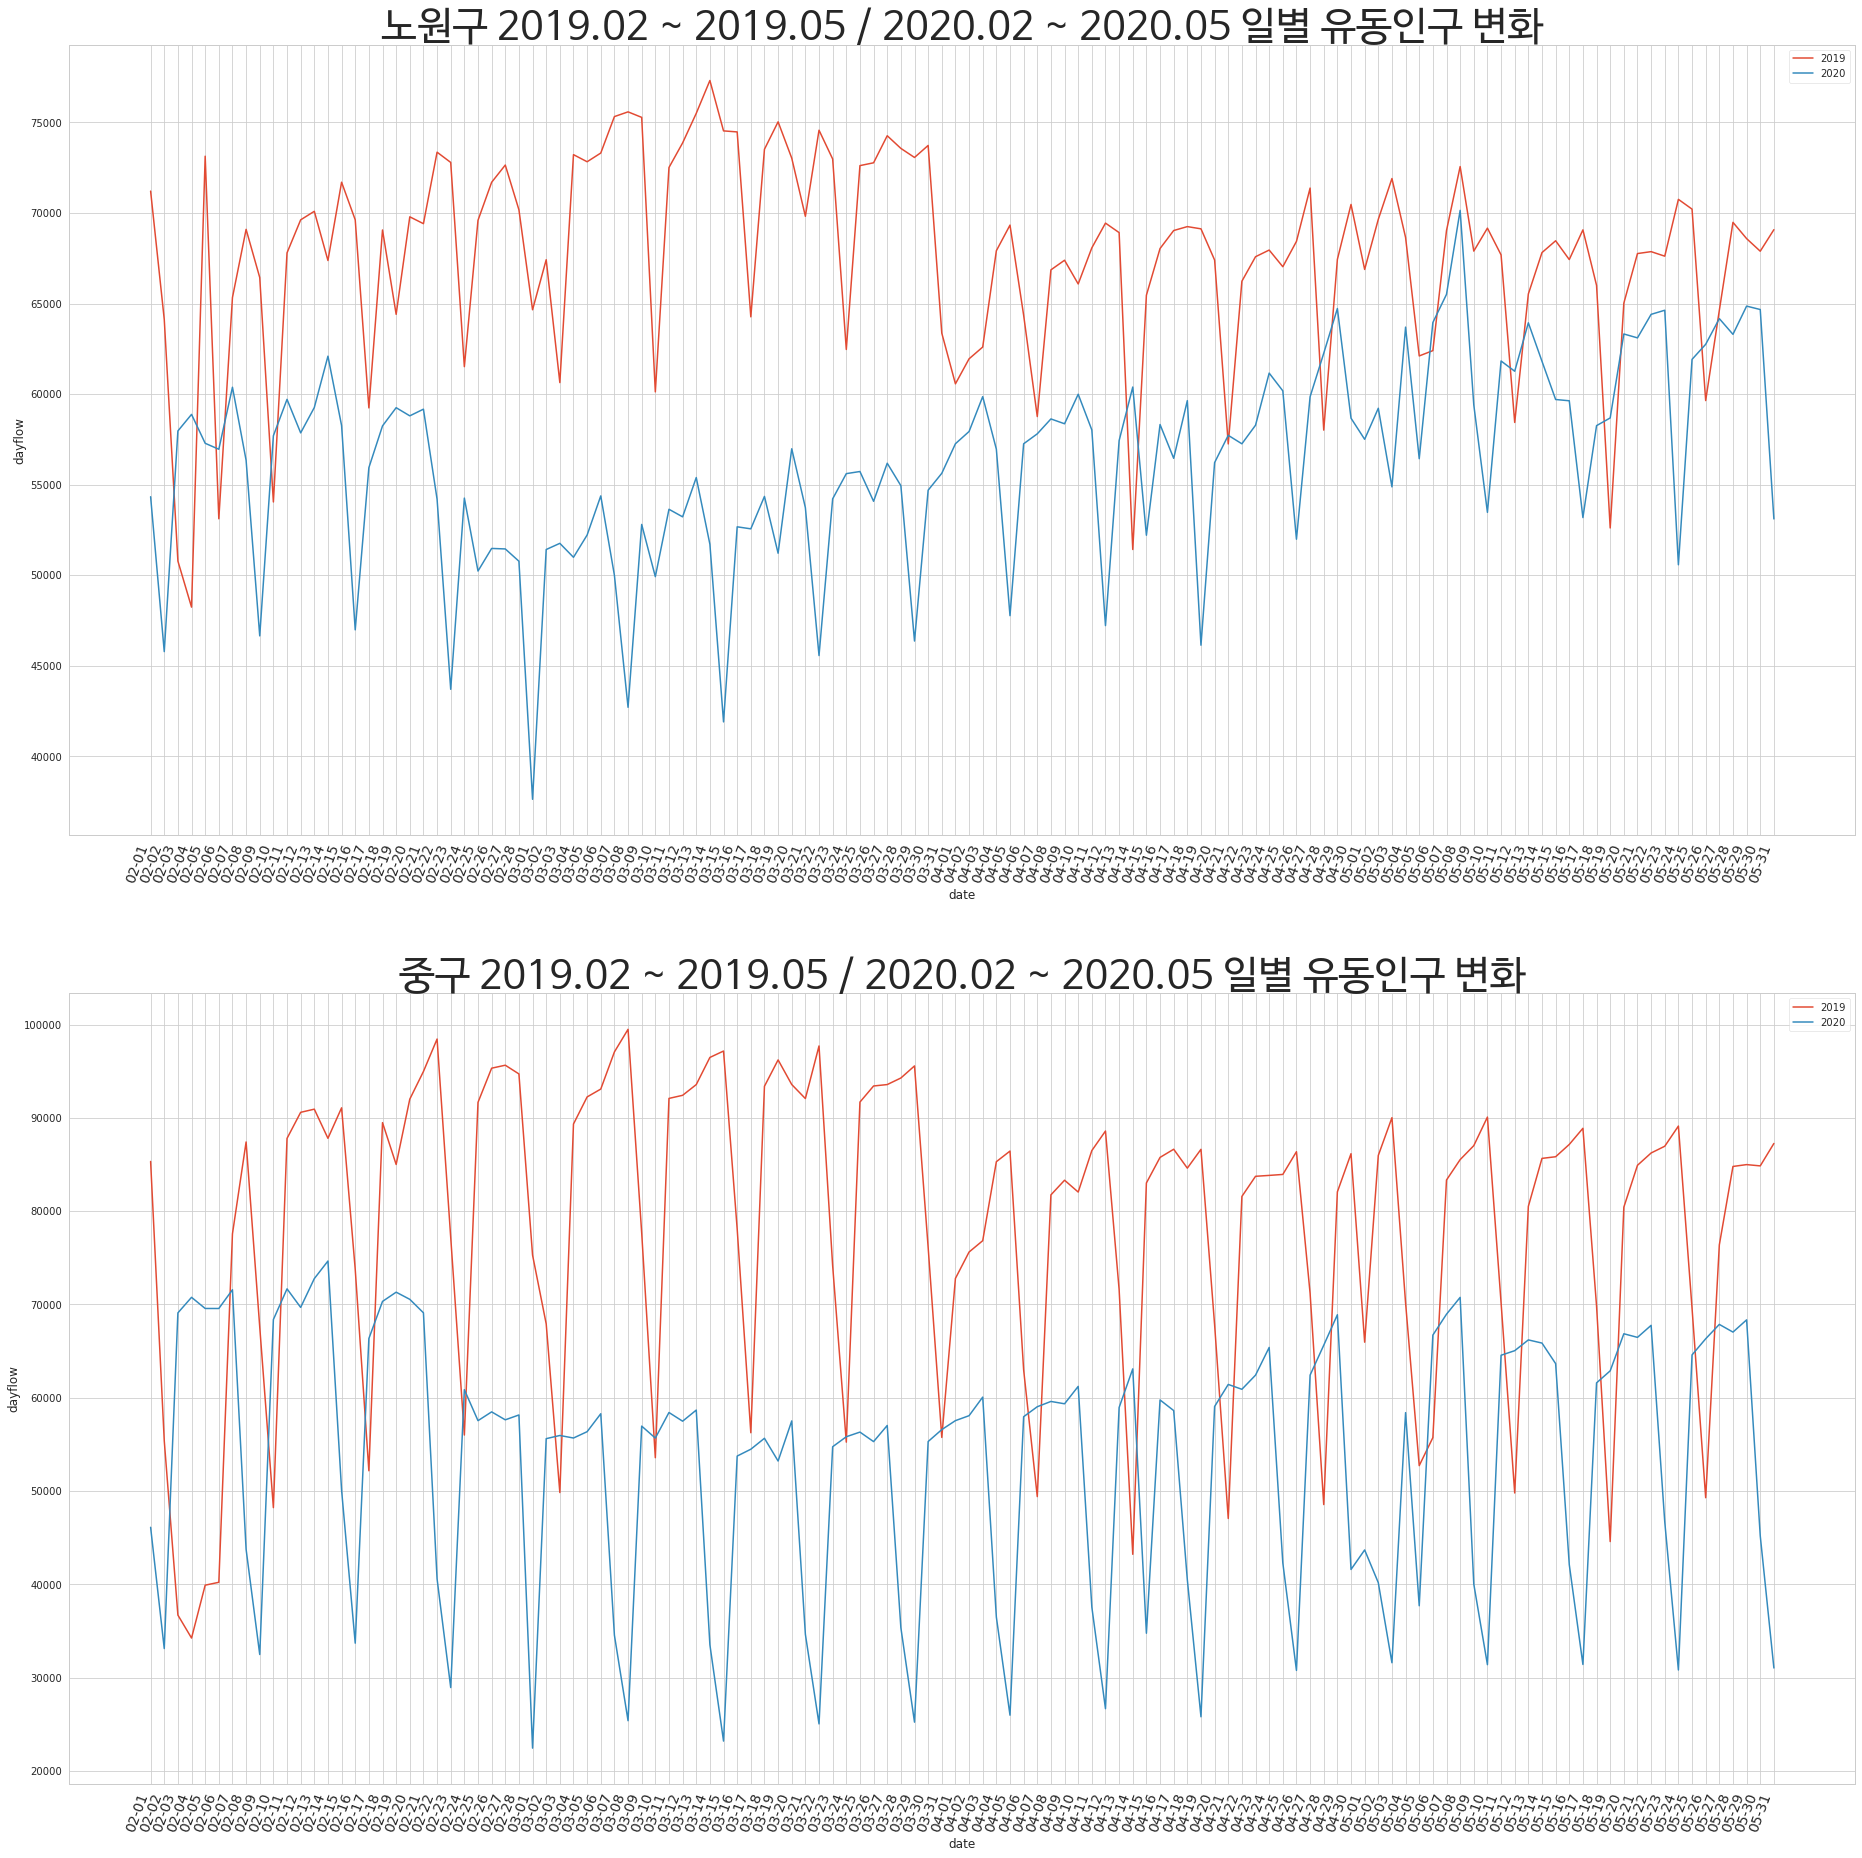

In [288]:
compare_dayflow(no_dayflow,sjung_dayflow,'노원구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화',
               '중구 2019.02 ~ 2019.05 / 2020.02 ~ 2020.05 일별 유동인구 변화')

# 주별 유동인구 추세

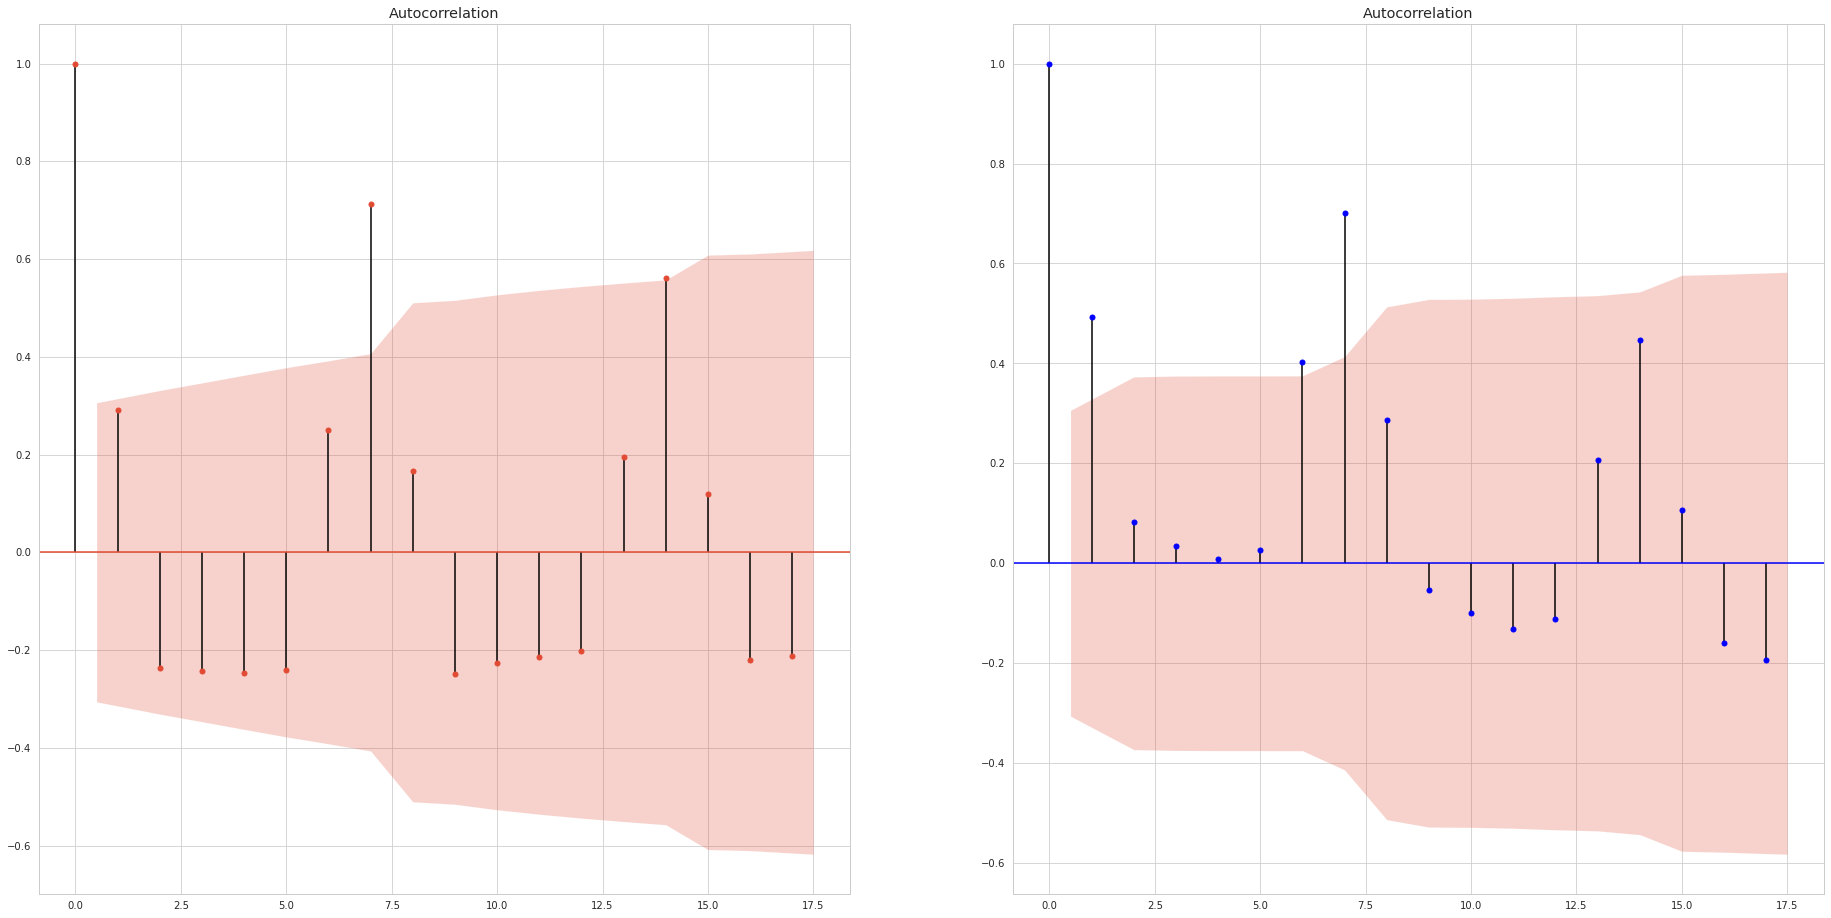

In [289]:
# 2019 2020 일간 유동인구 합 ACF

fig,ax=plt.subplots(1,2,figsize=(32,16))
plot_acf(acf(time_df.groupby('date').sum()['2019']['dayflow']),ax=ax[0],alpha=0.05)
plot_acf(acf(time_df.groupby('date').sum()['2020']['dayflow']),ax=ax[1],c='b',alpha=0.05)
plt.show()        

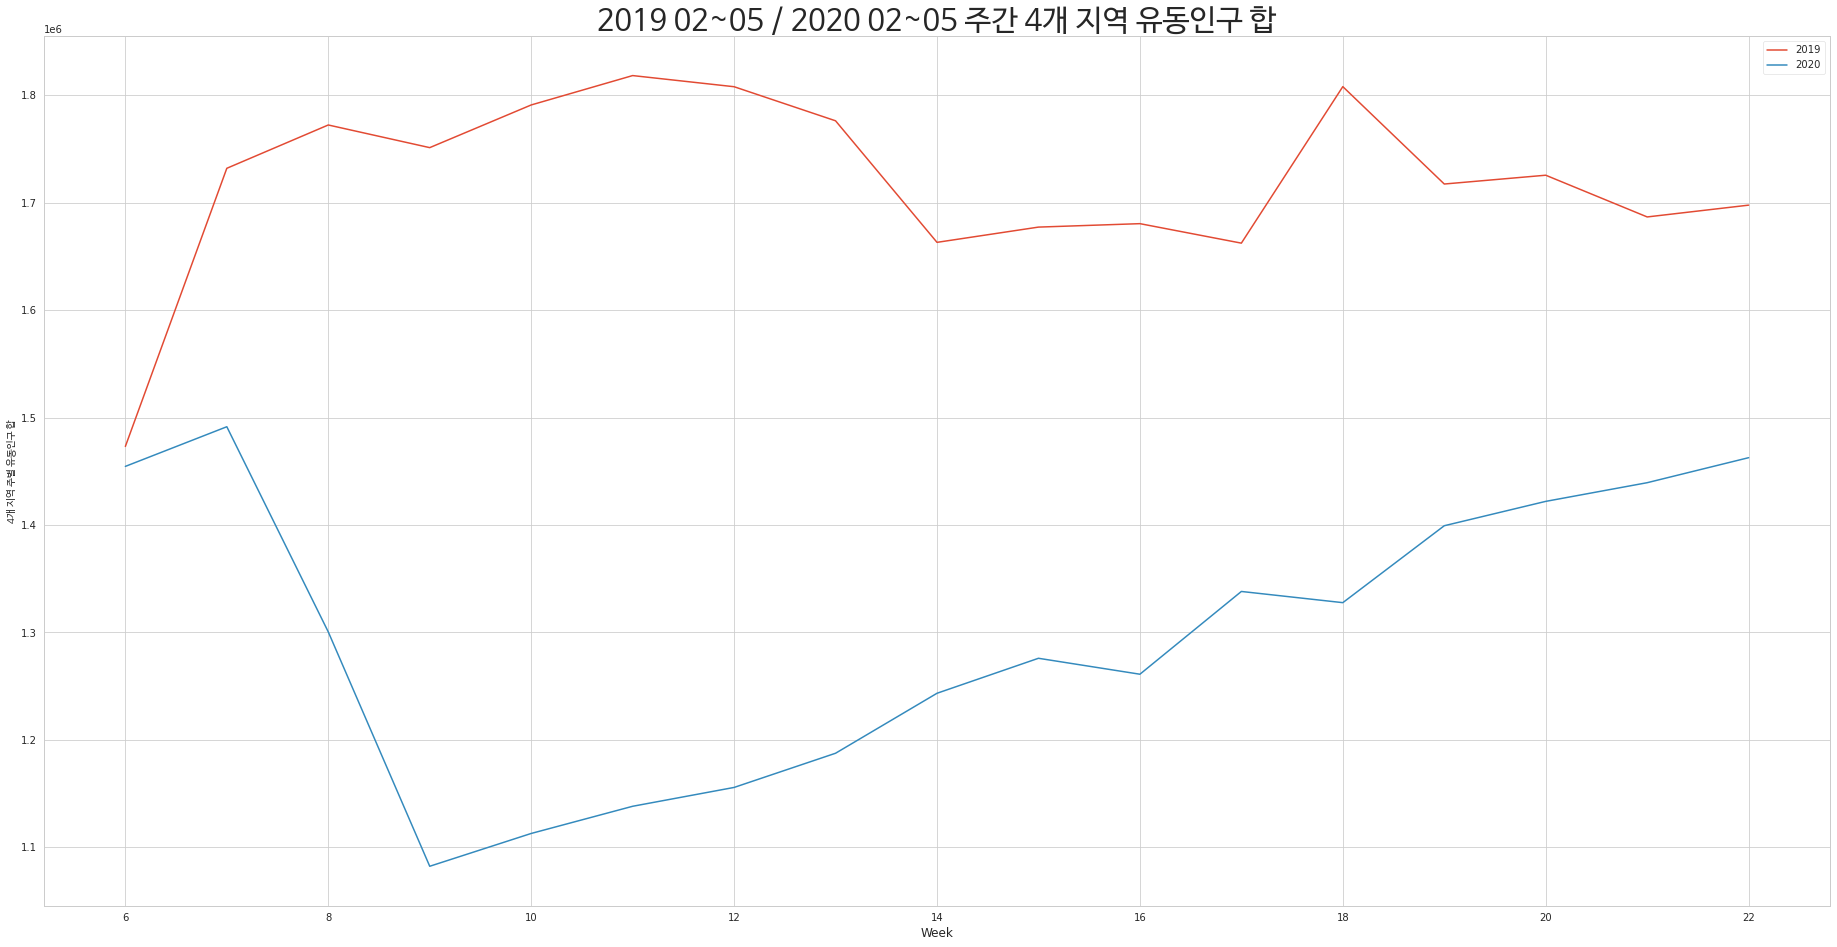

In [290]:
week_flow_2019=pd.DataFrame(time_df.groupby('date').sum()['2019'].resample('W-Fri')['dayflow'].sum()[1:]) # 토 ~ 금 집계 (제외 데이터 (2월 1일))
week_flow_2020=pd.DataFrame(time_df.groupby('date').sum()['2020'].resample('W-Sun')['dayflow'].sum()[1:]) # 월 ~ 일 집계 (제외 데이터 (2월 1일,2일))
week_flow_2019.index = week_flow_2019.index.week # 2019 6주 ~ 22주
week_flow_2020.index = week_flow_2020.index.week # 2020 6주 ~ 22주  

fig,ax=plt.subplots(figsize=(32,16))
sns.lineplot(data=week_flow_2019,x=week_flow_2019.index,y='dayflow',ax=ax,label='2019')
sns.lineplot(data=week_flow_2020,x=week_flow_2020.index,y='dayflow',ax=ax,label='2020')
ax.set_xlabel('Week')
ax.set_ylabel('4개 지역 주별 유동인구 합',fontproperties=font)
plt.title('2019 02~05 / 2020 02~05 주간 4개 지역 유동인구 합',fontproperties=font,size=30)
plt.legend()
plt.show()

# 일별 평균 유동인구와 확진자 수 상관관계

In [291]:
suseong_df=pd.read_csv('../input/suseonggu-corona/__.csv',sep=',',header=None)
suseong_df.columns=['date','누적 확진자 수']
suseong_df.head()

,date,누적 확진자 수
0,2.20,5
1,2.21,10
2,2.22,31
3,2.23,48
4,2.24,56


In [292]:
suseong_df=suseong_df.set_index('date')

In [293]:
suseong_df.index=suseong_df.index.astype(str)
suseong_ind = []
for i,ind in enumerate(suseong_df.index):
    ind=ind.replace('.','-')
    if len(ind) ==3:
        suseong_ind.append('2020-0'+ind+'0')
    else:
        suseong_ind.append('2020-0'+ind)
    
suseong_df.index= suseong_ind

In [294]:
suseong_df.index=pd.to_datetime(suseong_df.index,format='%Y-%m-%d')
suseong_df['누적 확진자 수']=suseong_df['누적 확진자 수'].str.replace(',','').astype(int)

In [295]:
suseong_df['당일 확진자 수']=suseong_df.diff()
suseong_df=suseong_df.fillna(5)
suseong_df['당일 확진자 수']=suseong_df['당일 확진자 수'].astype(int)

In [296]:
for i in pd.date_range("2/1/2020", "2/19/2020"):
        suseong_df.loc[i]=[0,0]
suseong_df=suseong_df.sort_index()

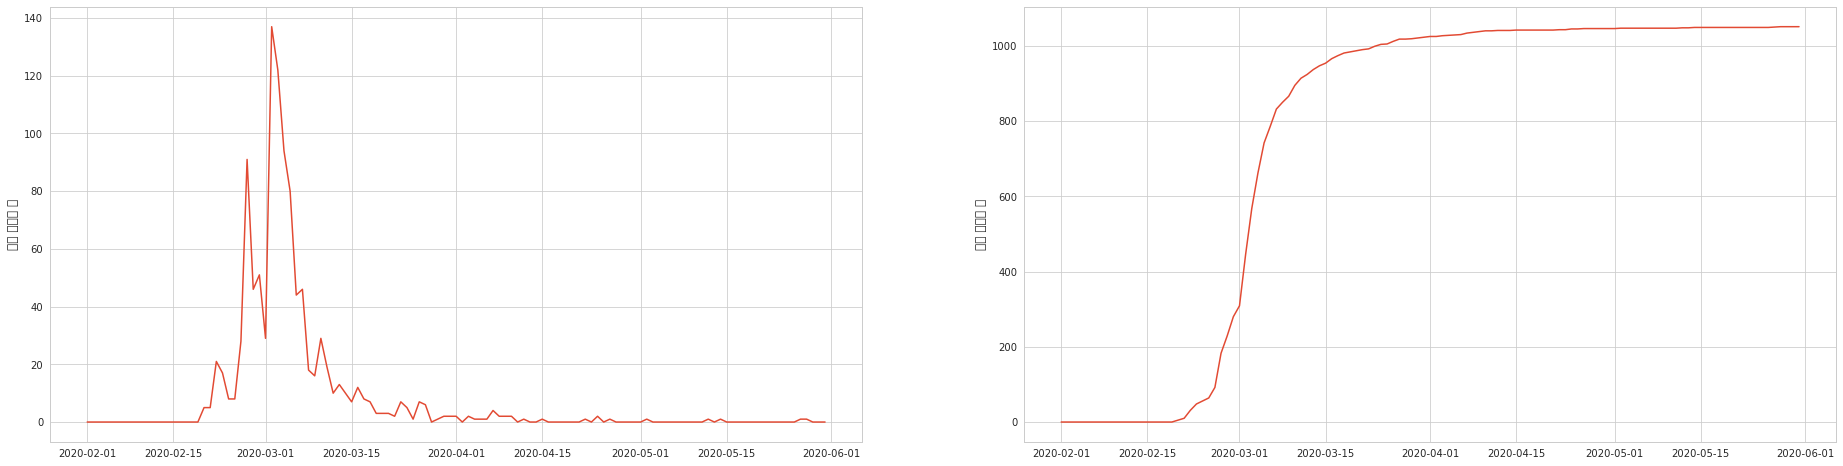

In [297]:
fig,ax = plt.subplots(1,2,figsize=(32,8))
sns.lineplot(data=suseong_df,x=suseong_df.index,y='당일 확진자 수',ax=ax[0])
sns.lineplot(data=suseong_df,x=suseong_df.index,y='누적 확진자 수',ax=ax[1])


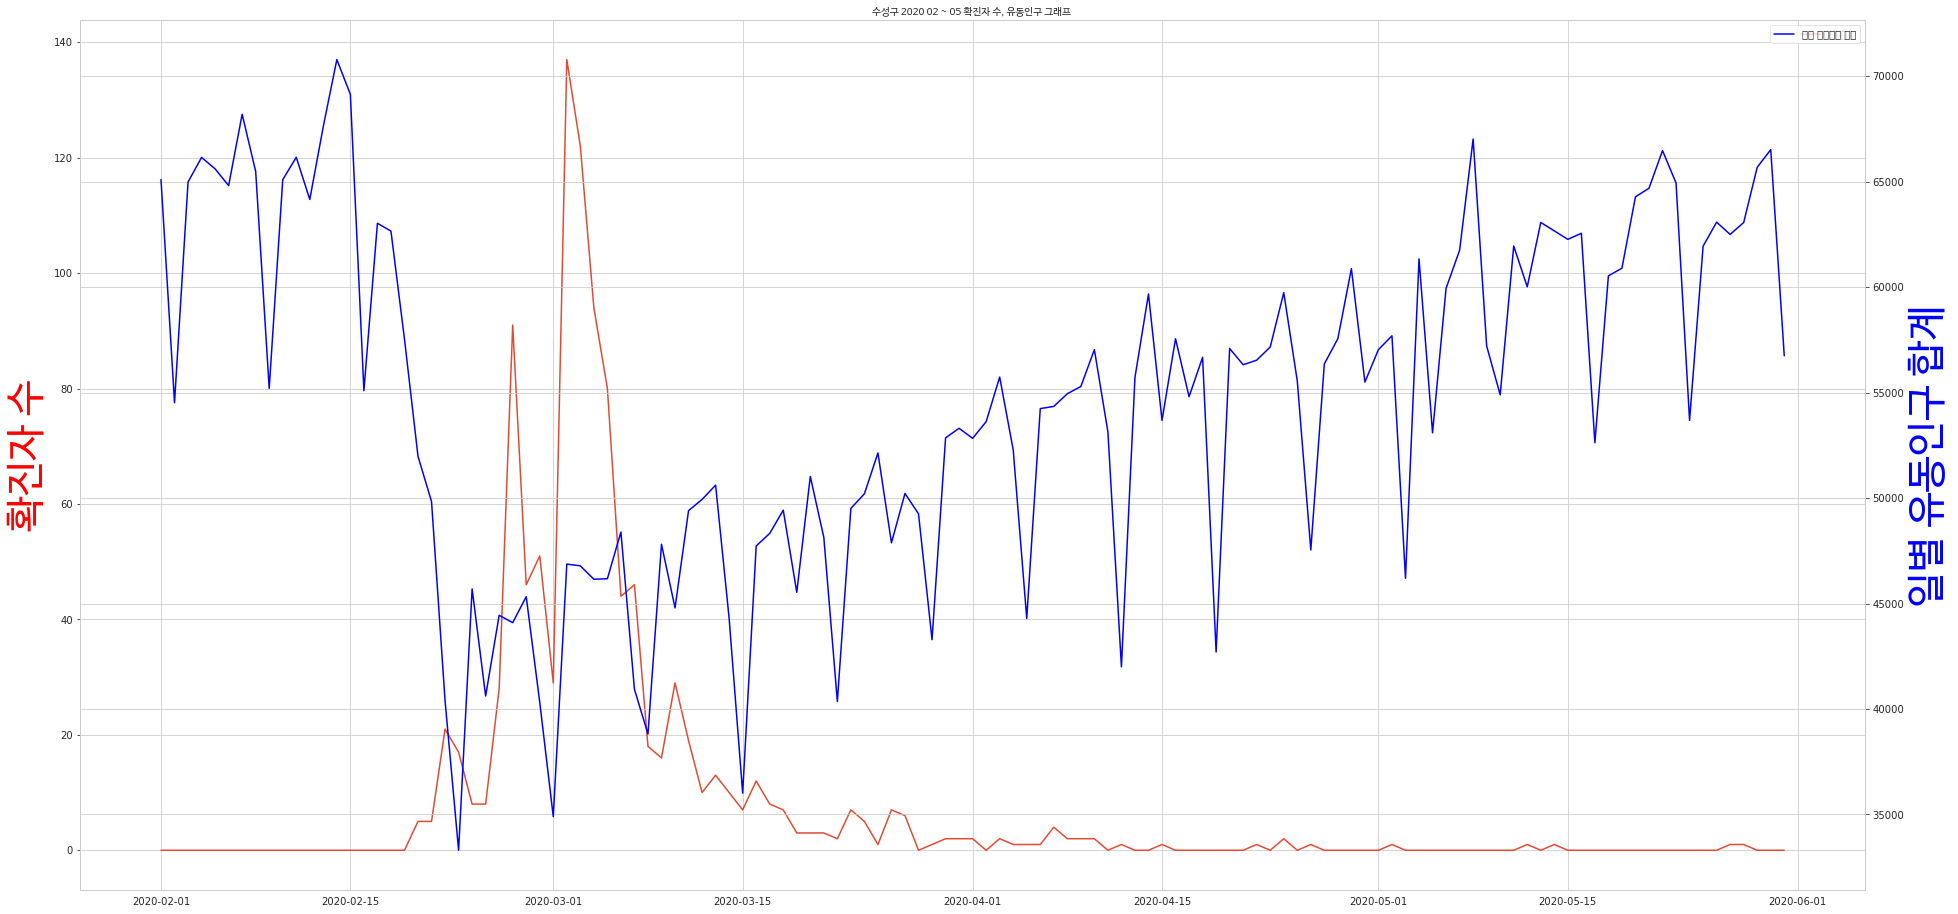

In [298]:
suseong_flow_df=suseong_dayflow.set_index('date')
fig,ax=plt.subplots(figsize=(32,16))
sns.lineplot(data=suseong_df,x=suseong_df.index,y='당일 확진자 수',ax=ax,label='확진자 수')
ax2 = ax.twinx()
sns.lineplot(data=suseong_flow_df['2020'],x=suseong_df.index,y='dayflow',ax=ax2,c='b',label='일별 유동인구 합계')
ax.set_ylabel('확진자 수',fontproperties=font,size=40,c='r')
ax2.set_ylabel('일별 유동인구 합계',fontproperties=font,size=40,c='b')
ax.set_title('수성구 2020 02 ~ 05 확진자 수, 유동인구 그래프 ',fontproperties=font)
plt.show()

In [299]:
suseong_time_flow=time_df[time_df['GU_NM']=='수성구'].groupby('date').sum()
suseong_time_flow.head()


,STD_YM,STD_YMD,HDONG_CD,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,dayflow
date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,4643746,464374623,62699388000,21055.59,15366.48,10498.38,8279.48,8487.16,16123.48,30572.26,...,131843.21,91788.99,150033.03,156251.82,120414.19,94449.03,89752.09,65950.22,40279.51,79177.77
2019-02-02,4643746,464374646,62699388000,29796.22,21517.70,15246.60,11878.90,10374.11,15063.08,22251.29,...,133894.00,132132.02,138661.25,127582.81,101626.40,90099.77,82147.07,59981.04,41454.17,75516.51
2019-02-03,4643746,464374669,62699388000,30126.22,21708.27,16834.57,11696.53,10557.84,12942.50,15857.26,...,115782.56,114663.77,115277.02,108811.70,90023.46,79532.89,73772.52,54188.37,37873.19,62976.17
2019-02-04,4643746,464374692,62699388000,27111.26,19725.18,15144.56,11032.15,10066.50,12333.45,16164.59,...,100905.51,103163.74,105860.03,95408.15,87660.87,75864.88,65234.07,46111.26,30906.94,59186.49
2019-02-05,4643746,464374715,62699388000,19553.99,13149.08,9359.99,7148.75,6853.10,12141.84,28417.34,...,135413.25,132142.20,127800.90,106583.23,91433.90,89574.38,78004.62,57426.07,37727.54,74627.73


In [300]:
suseong_week_flow_2019=pd.DataFrame(suseong_time_flow['2019'].resample('W-Fri')['dayflow'].sum()[1:]) # 토 ~ 금 집계 (제외 데이터 (2월 1일))
suseong_week_flow_2020=pd.DataFrame(suseong_time_flow['2020'].resample('W-Sun')['dayflow'].sum()[1:]) # 월 ~ 일 집계 (제외 데이터 (2월 1일,2일))
suseong_week_flow_2019.index = suseong_week_flow_2019.index.week # 2019 6주 ~ 22주
suseong_week_flow_2020.index = suseong_week_flow_2020.index.week # 2020 6주 ~ 22주  

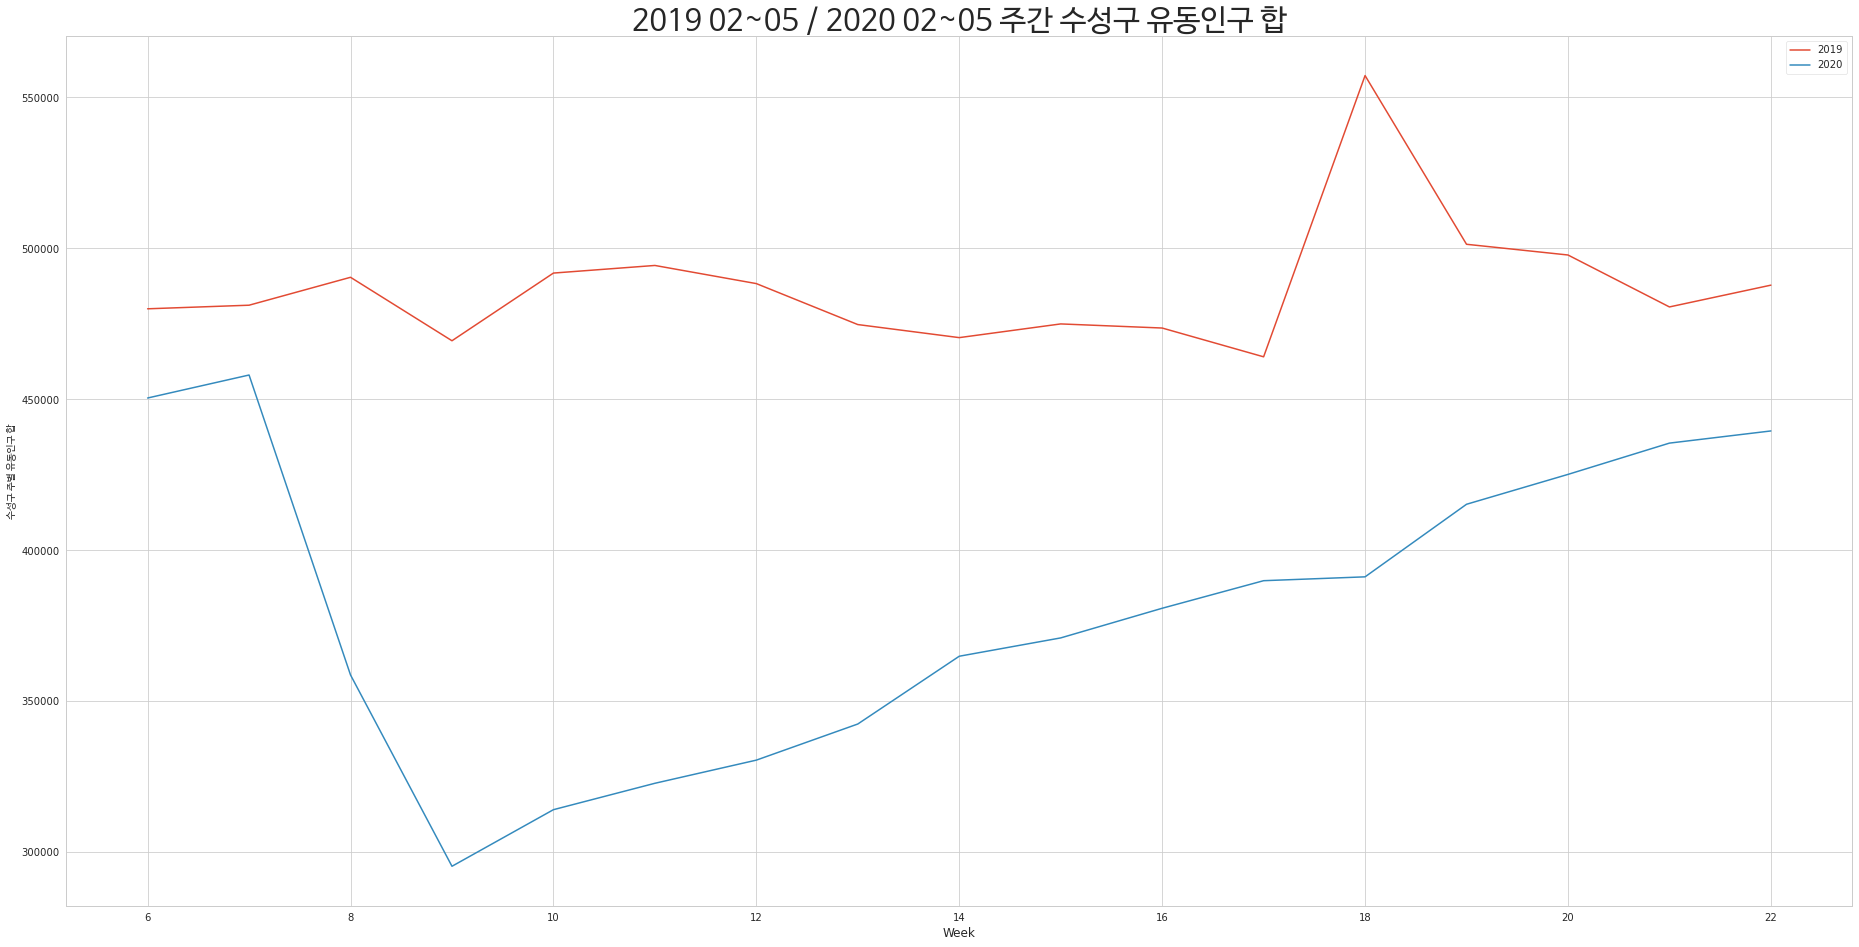

In [301]:
fig,ax=plt.subplots(figsize=(32,16))
sns.lineplot(data=suseong_week_flow_2019,x=suseong_week_flow_2019.index,y='dayflow',ax=ax,label='2019')
sns.lineplot(data=suseong_week_flow_2020,x=suseong_week_flow_2020.index,y='dayflow',ax=ax,label='2020')
ax.set_xlabel('Week')
ax.set_ylabel('수성구 주별 유동인구 합',fontproperties=font)
plt.title('2019 02~05 / 2020 02~05 주간 수성구 유동인구 합',fontproperties=font,size=30)
plt.legend()
plt.show()

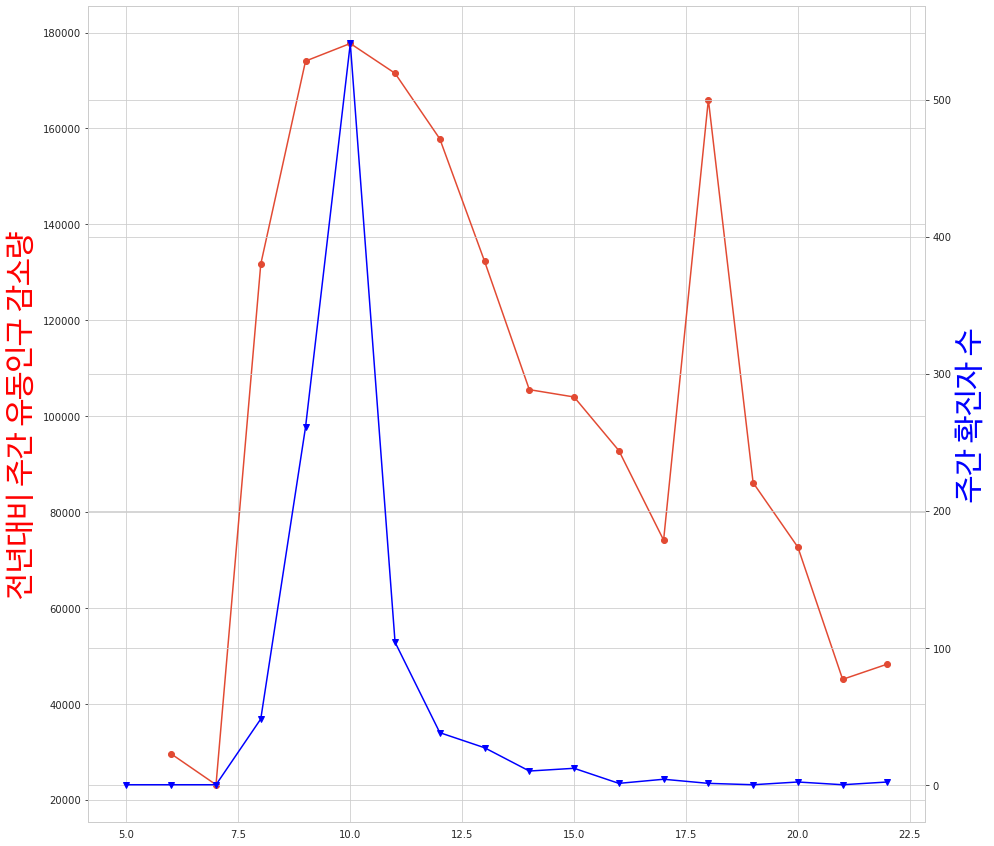

In [302]:
fig,ax=plt.subplots()
# sns.pointplot(data=suseong_week_flow_2019-suseong_week_flow_2020,x=suseong_week_flow_2019-suseong_week_flow_2020.index,y=(suseong_week_flow_2019-suseong_week_flow_2020).dayflow,
#               ax=ax,label='전년대비 주간 유동인구 감소량')
ax.plot(suseong_week_flow_2019-suseong_week_flow_2020,marker='o')
ax2=ax.twinx()
# sns.pointplot(data=suseong_df.resample('W-sun').sum(),x=suseong_df.resample('W-sun').sum().index.week,y='당일 확진자 수',ax=ax2,label='주간 확진자 수',c='b')
ax2.plot(suseong_df.resample('W-sun').sum().index.week,suseong_df.resample('W-sun').sum()['당일 확진자 수'],c='b',marker='v')
ax.set_ylabel('전년대비 주간 유동인구 감소량',fontproperties=font,size=30,c='r')
ax2.set_ylabel('주간 확진자 수',fontproperties=font,size=30,c='b')
plt.show()
#주차별 수성구 유동인구 감소량 (2019 - 2020)


In [303]:
print('2020 전년 대비 유동인구 급감 주 마지막 날짜', suseong_time_flow['2020'].resample('W-Fri').sum().index[(suseong_time_flow['2020'].resample('W-Fri').sum()).index.week.tolist().index(18)])
print('2019 전년 대비 유동인구 급감 주 마지막 날짜', suseong_time_flow['2019'].resample('W-Fri').sum().index[(suseong_time_flow['2019'].resample('W-Fri').sum()).index.week.tolist().index(18)])
# 18번째 주에서  급격한 유동인구 감소 (4월 27일 ~ 5월 3일 / 5월5일 어린이날, 5월 6일 대체휴일) 
# 20년 대구 컬러풀 페스티벌 취소

2020 전년 대비 유동인구 급감 주 마지막 날짜 2020-05-01 00:00:00
2019 전년 대비 유동인구 급감 주 마지막 날짜 2019-05-03 00:00:00


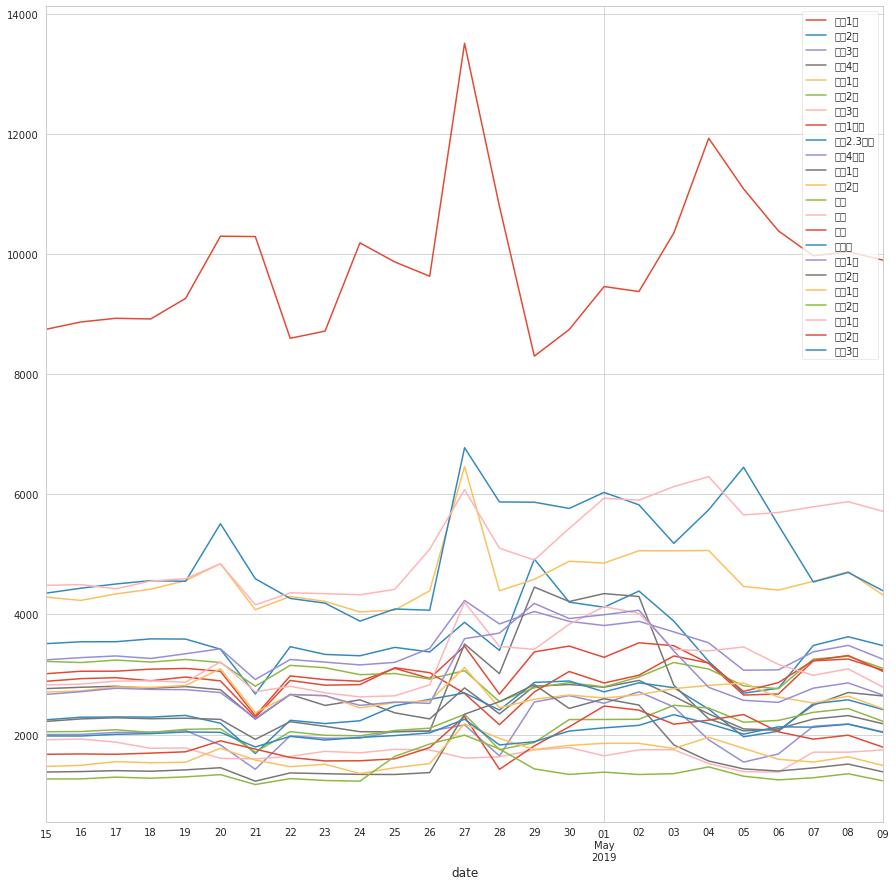

In [304]:
# time_df[time_df['GU_NM']=='수성구'].groupby(['HDONG_NM','date']).sum().loc['고산1동','dayflow']
suseong_dong_list=time_df[time_df['GU_NM']=='수성구'].HDONG_NM.unique().tolist()
for dong_nm in suseong_dong_list:
    gu_temp=time_df[time_df['GU_NM']=='수성구'].groupby(['HDONG_NM','date']).sum().loc[dong_nm,'dayflow']
    gu_temp[(gu_temp.index>='2019-04-15')&(gu_temp.index<='2019-05-09')].plot()
plt.legend(labels=suseong_dong_list)
plt.show()

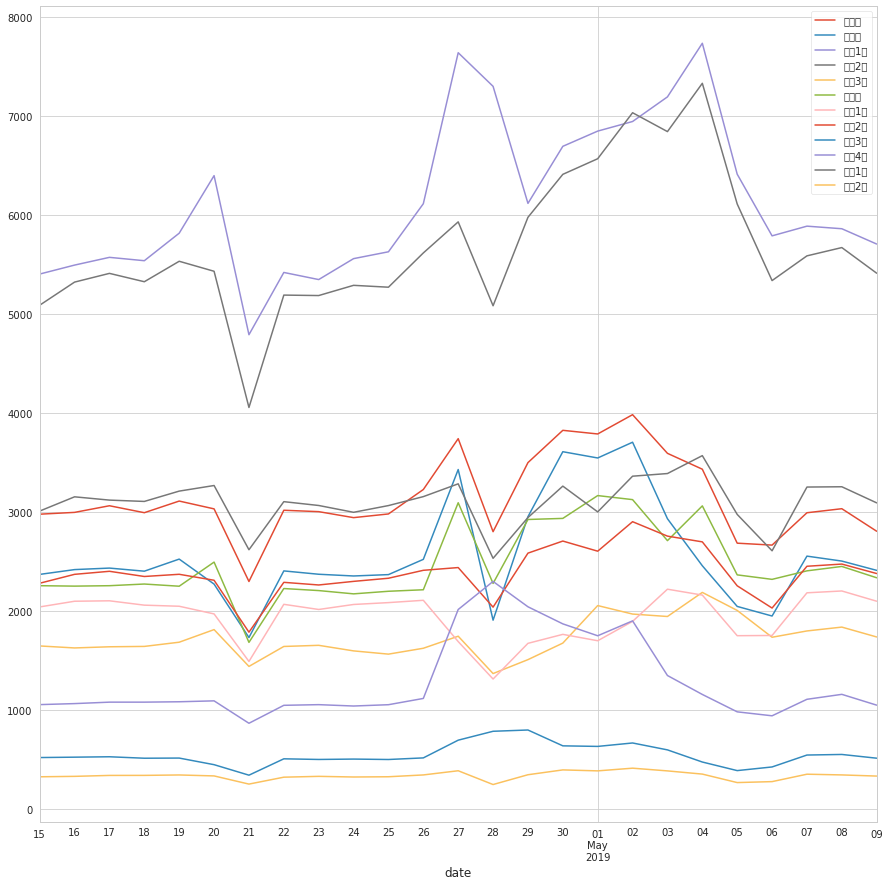

In [305]:
# time_df[time_df['GU_NM']=='수성구'].groupby(['HDONG_NM','date']).sum().loc['고산1동','dayflow']
suseong_dong_list=time_df[time_df['GU_NM']=='대구_중구'].HDONG_NM.unique().tolist()
for dong_nm in suseong_dong_list:
    gu_temp=time_df[time_df['GU_NM']=='대구_중구'].groupby(['HDONG_NM','date']).sum().loc[dong_nm,'dayflow']
    gu_temp[(gu_temp.index>='2019-04-15')&(gu_temp.index<='2019-05-09')].plot()
plt.legend(labels=suseong_dong_list)
plt.show()

In [306]:
#대구 중구, 수성구 다수의 동에서 4월 27일 다른 주의 토요일보다 유동인구가 많았다 
"""지난 4월 27일(토), 불기2563년 부처님오신 날(4월 초팔일, 양력 5월 12일)을 맞아 대구 두류공원에
서는 약 천명의 외국인을 비롯하여 권영진대구시장, 
효광동화사주지스님과 불교계인사 및 시민 등등 5만여 명이 운집한 거운데 형형색색 달구벌 관등놀이가 성대하게 거행되었다.
연호동 위치 삼성라이온즈 파크 -> 4월 27일 홈 경기
5월 1일 근로자의 날 
"""

'지난 4월 27일(토), 불기2563년 부처님오신 날(4월 초팔일, 양력 5월 12일)을 맞아 대구 두류공원에\n서는 약 천명의 외국인을 비롯하여 권영진대구시장, \n효광동화사주지스님과 불교계인사 및 시민 등등 5만여 명이 운집한 거운데 형형색색 달구벌 관등놀이가 성대하게 거행되었다.\n연호동 위치 삼성라이온즈 파크 -> 4월 27일 홈 경기\n5월 1일 근로자의 날 \n'

2. SNS

In [307]:
home_training_df = pd.read_csv('../input/hometraining/hometrain.csv')
home_training_df

,카테고리: 모든 카테고리
주,홈트레이닝: (대한민국)
2019-01-06,34
2019-01-13,17
2019-01-20,45
2019-01-27,34
...,...
2020-08-09,42
2020-08-16,73
2020-08-23,92
2020-08-30,73


In [308]:
home_training_df.rename(columns=home_training_df.iloc[0])
home_training_df = home_training_df.iloc[1:,:]

In [309]:
home_training_df.head()

,카테고리: 모든 카테고리
2019-01-06,34
2019-01-13,17
2019-01-20,45
2019-01-27,34
2019-02-03,36


In [310]:
home_training_df.reset_index(inplace=True)

In [311]:
home_training_df.columns = ['date','ind']

In [312]:
home_training_df['date']=pd.to_datetime(home_training_df['date'],format='%Y-%m-%d')

In [313]:
home_training_df['ind']=home_training_df['ind'].apply(pd.to_numeric)

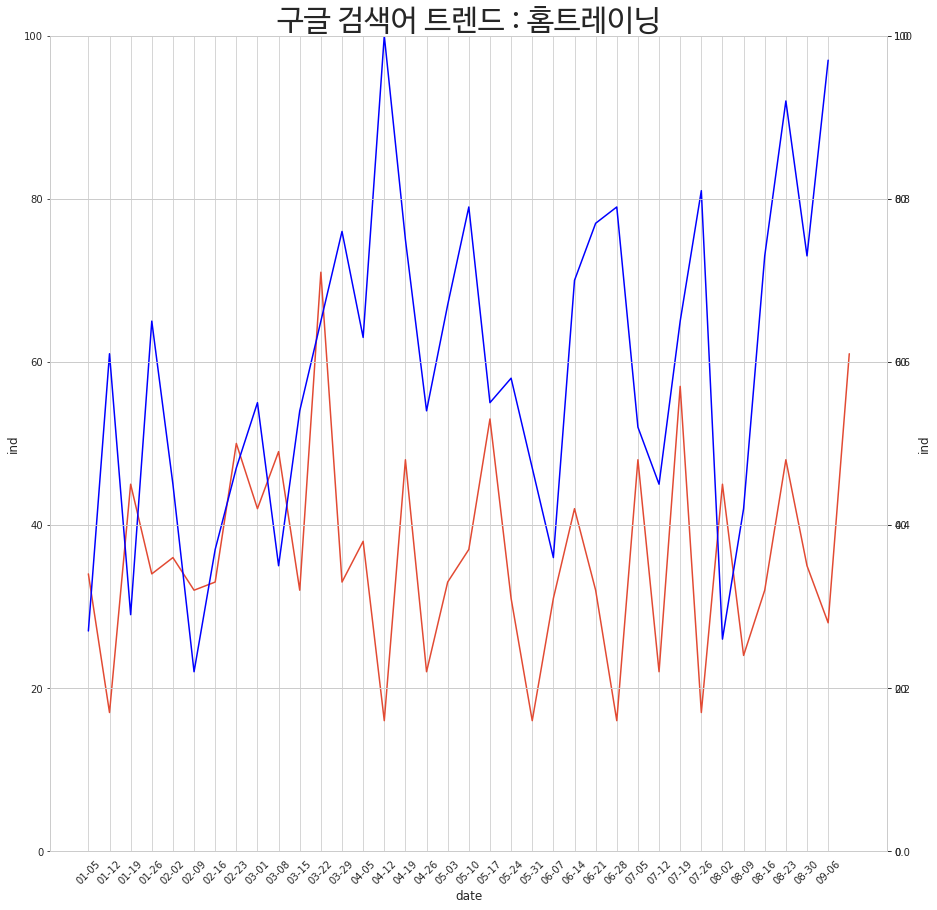

In [314]:
fig,ax=plt.subplots()
sns.lineplot(x=home_training_df[home_training_df.date<='2019-09-15']['date'].apply(lambda x : x.strftime('%m-%d')),
            y=home_training_df[home_training_df.date<='2019-09-15']['ind'],ax=ax)
ax2 =ax.twinx()
ax.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax3=ax.twinx()
# ax3.set_ylim([-100,100])
sns.lineplot(x=home_training_df[(home_training_df.date>='2020-01-01')&(home_training_df.date<='2020-09-15')]['date'].apply(lambda x : x.strftime('%m-%d')),
            y=home_training_df[(home_training_df.date>='2020-01-01')&((home_training_df.date<='2020-09-15'))]['ind'],ax=ax2,c='b')
ax.xaxis.set_tick_params(rotation=45)
# sns.lineplot(x=home_training_df[(home_training_df.date>='2020-01-01')&(home_training_df.date<='2020-09-15')]['date'].apply(lambda x : x.strftime('%m-%d')),
#              y=home_training_df[(home_training_df.date>='2020-01-01')&((home_training_df.date<='2020-09-15'))]['ind'].values-home_training_df[home_training_df.date<'2019-09-15']['ind'].values,
#              ax=ax3,c='c')
                                                                                                                           
plt.title('구글 검색어 트렌드 : 홈트레이닝',fontproperties=font,size=30)
plt.show()